In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score,mean_absolute_error,r2_score,mean_squared_error,silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("CarPrice.csv")
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [49]:
df.shape

(205, 26)

In [50]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [51]:
df.columns = df.columns.str.lower()
df

car_id  symboling                   carname fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [52]:
df[['company', 'model']] = df['carname'].str.split(' ', 1, expand=True)
# Drop the original 'carname' column if no longer needed
df.drop(columns=['carname'], inplace=True)

# Display the DataFrame to see the result
df

car_id  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
0            front       88.6      168.8  ...       3.47    2.68   
1            front       88.6      168.8  ...       3.47    2.68   
2            front       94.5      171.2  ...       2.68    3.47   
3            front       99.8      176.6  ...       3.19    3.40   
4            front       99.4      176.6  ...       3.19    3.40   
..             ...        ...        ...  ...        ...     ...   
200          front      109.1      188.8  ...       3.78    3.15   
201          front      109.1      188.8  ...       3.78    3.15   
202          front      109.1      188.8  ...       3.58    2.87   
203          front      109.1      188.8  ...       3.01    3.40   
204          front      109.1      188.8  ...       3.78    3.15   

     compressionratio horsepower peakrpm  citympg highwaympg    price  \
0                 9.0        111    5000       21         27  13495.0   
1                 9.0        111    5000       21         27  16500.0   
2                 9.0        154    5000       19         26  16500.0   
3                10.0        102    5500       24         30  13950.0   
4                 8.0        115    5500       18         22  17450.0   
..                ...        ...     ...      ...        ...      ...   
200               9.5        114    5400       23         28  16845.0   
201               8.7        160    5300       19         25  19045.0   
202               8.8        134    5500       18         23  21485.0   
203              23.0        106    4800       26         27  22470.0   
204               9.5        114    5400       19         25  22625.0   

         company         model  
0    alfa-romero        giulia  
1    alfa-romero       stelvio  
2    alfa-romero  Quadrifoglio  
3           audi        100 ls  
4           audi         100ls  
..           ...           ...  
200        volvo     145e (sw)  
201        volvo         144ea  
202        volvo         244dl  
203        volvo           246  
204        volvo         264gl  

[205 rows x 27 columns]

In [143]:
df.isnull().sum()

car_id              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
company             0
model               2
dtype: int64

In [151]:
null_values_in_column = df['model'].isnull()

# Filter the DataFrame to show only the rows with null values in the specific column
rows_with_null_values = df[null_values_in_column]
rows_with_null_values

car_id  symboling fueltype aspiration doornumber    carbody drivewheel  \
138     139          2      gas        std        two  hatchback        fwd   
141     142          0      gas        std       four      sedan        fwd   

    enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
138          front       93.7      156.9  ...       3.62    2.36   
141          front       97.2      172.0  ...       3.62    2.64   

     compressionratio horsepower peakrpm  citympg highwaympg   price  company  \
138               9.0         69    4900       31         36  5118.0   subaru   
141               9.5         82    4800       32         37  7126.0   subaru   

     model  
138   None  
141   None  

[2 rows x 27 columns]

In [153]:
df['model'].fillna(df['company'], inplace=True)
df.isnull().sum()

car_id              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
company             0
model               0
dtype: int64

In [154]:
df.describe()

car_id   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [155]:
df.describe(include='object')

fueltype aspiration doornumber carbody drivewheel enginelocation  \
count       205        205        205     205        205            205   
unique        2          2          2       5          3              2   
top         gas        std       four   sedan        fwd          front   
freq        185        168        115      96        120            202   

       enginetype cylindernumber fuelsystem company model  
count         205            205        205     205   205  
unique          7              7          8      28   142  
top           ohc           four       mpfi  toyota   504  
freq          148            159         94      31     6

In [156]:
df_cat = df.select_dtypes(include='object')
df_cat

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

    enginetype cylindernumber fuelsystem      company         model  
0         dohc           four       mpfi  alfa-romero        giulia  
1         dohc           four       mpfi  alfa-romero       stelvio  
2         ohcv            six       mpfi  alfa-romero  Quadrifoglio  
3          ohc           four       mpfi         audi        100 ls  
4          ohc           five       mpfi         audi         100ls  
..         ...            ...        ...          ...           ...  
200        ohc           four       mpfi        volvo     145e (sw)  
201        ohc           four       mpfi        volvo         144ea  
202       ohcv            six       mpfi        volvo         244dl  
203        ohc            six        idi        volvo           246  
204        ohc           four       mpfi        volvo         264gl  

[205 rows x 11 columns]

In [157]:
df_num = df.select_dtypes(exclude='object')
df_num

car_id  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 16 columns]

In [158]:
for i in df_cat.columns:
    print('____________________________')
    print(df_cat[i].value_counts())

____________________________
gas       185
diesel     20
Name: fueltype, dtype: int64
____________________________
std      168
turbo     37
Name: aspiration, dtype: int64
____________________________
four    115
two      90
Name: doornumber, dtype: int64
____________________________
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
____________________________
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
____________________________
front    202
rear       3
Name: enginelocation, dtype: int64
____________________________
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
____________________________
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
____________________________
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi   

In [159]:
for j in df_num.columns:
    print(j)
    print(df_num[j].unique())
    print('-- -- -- -- -- -- -- -- -- -- --- -- -- - - --- -- - - -')
    print('no.of unique : ',df_num[j].nunique())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

car_id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
-- -- -- -- -- -- -- -- -- -- --- -- -- - - --- -- - - -
no.of unique :  205
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
sym

In [160]:
cols=list(df.select_dtypes(include=np.number).columns)
cols

['car_id',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

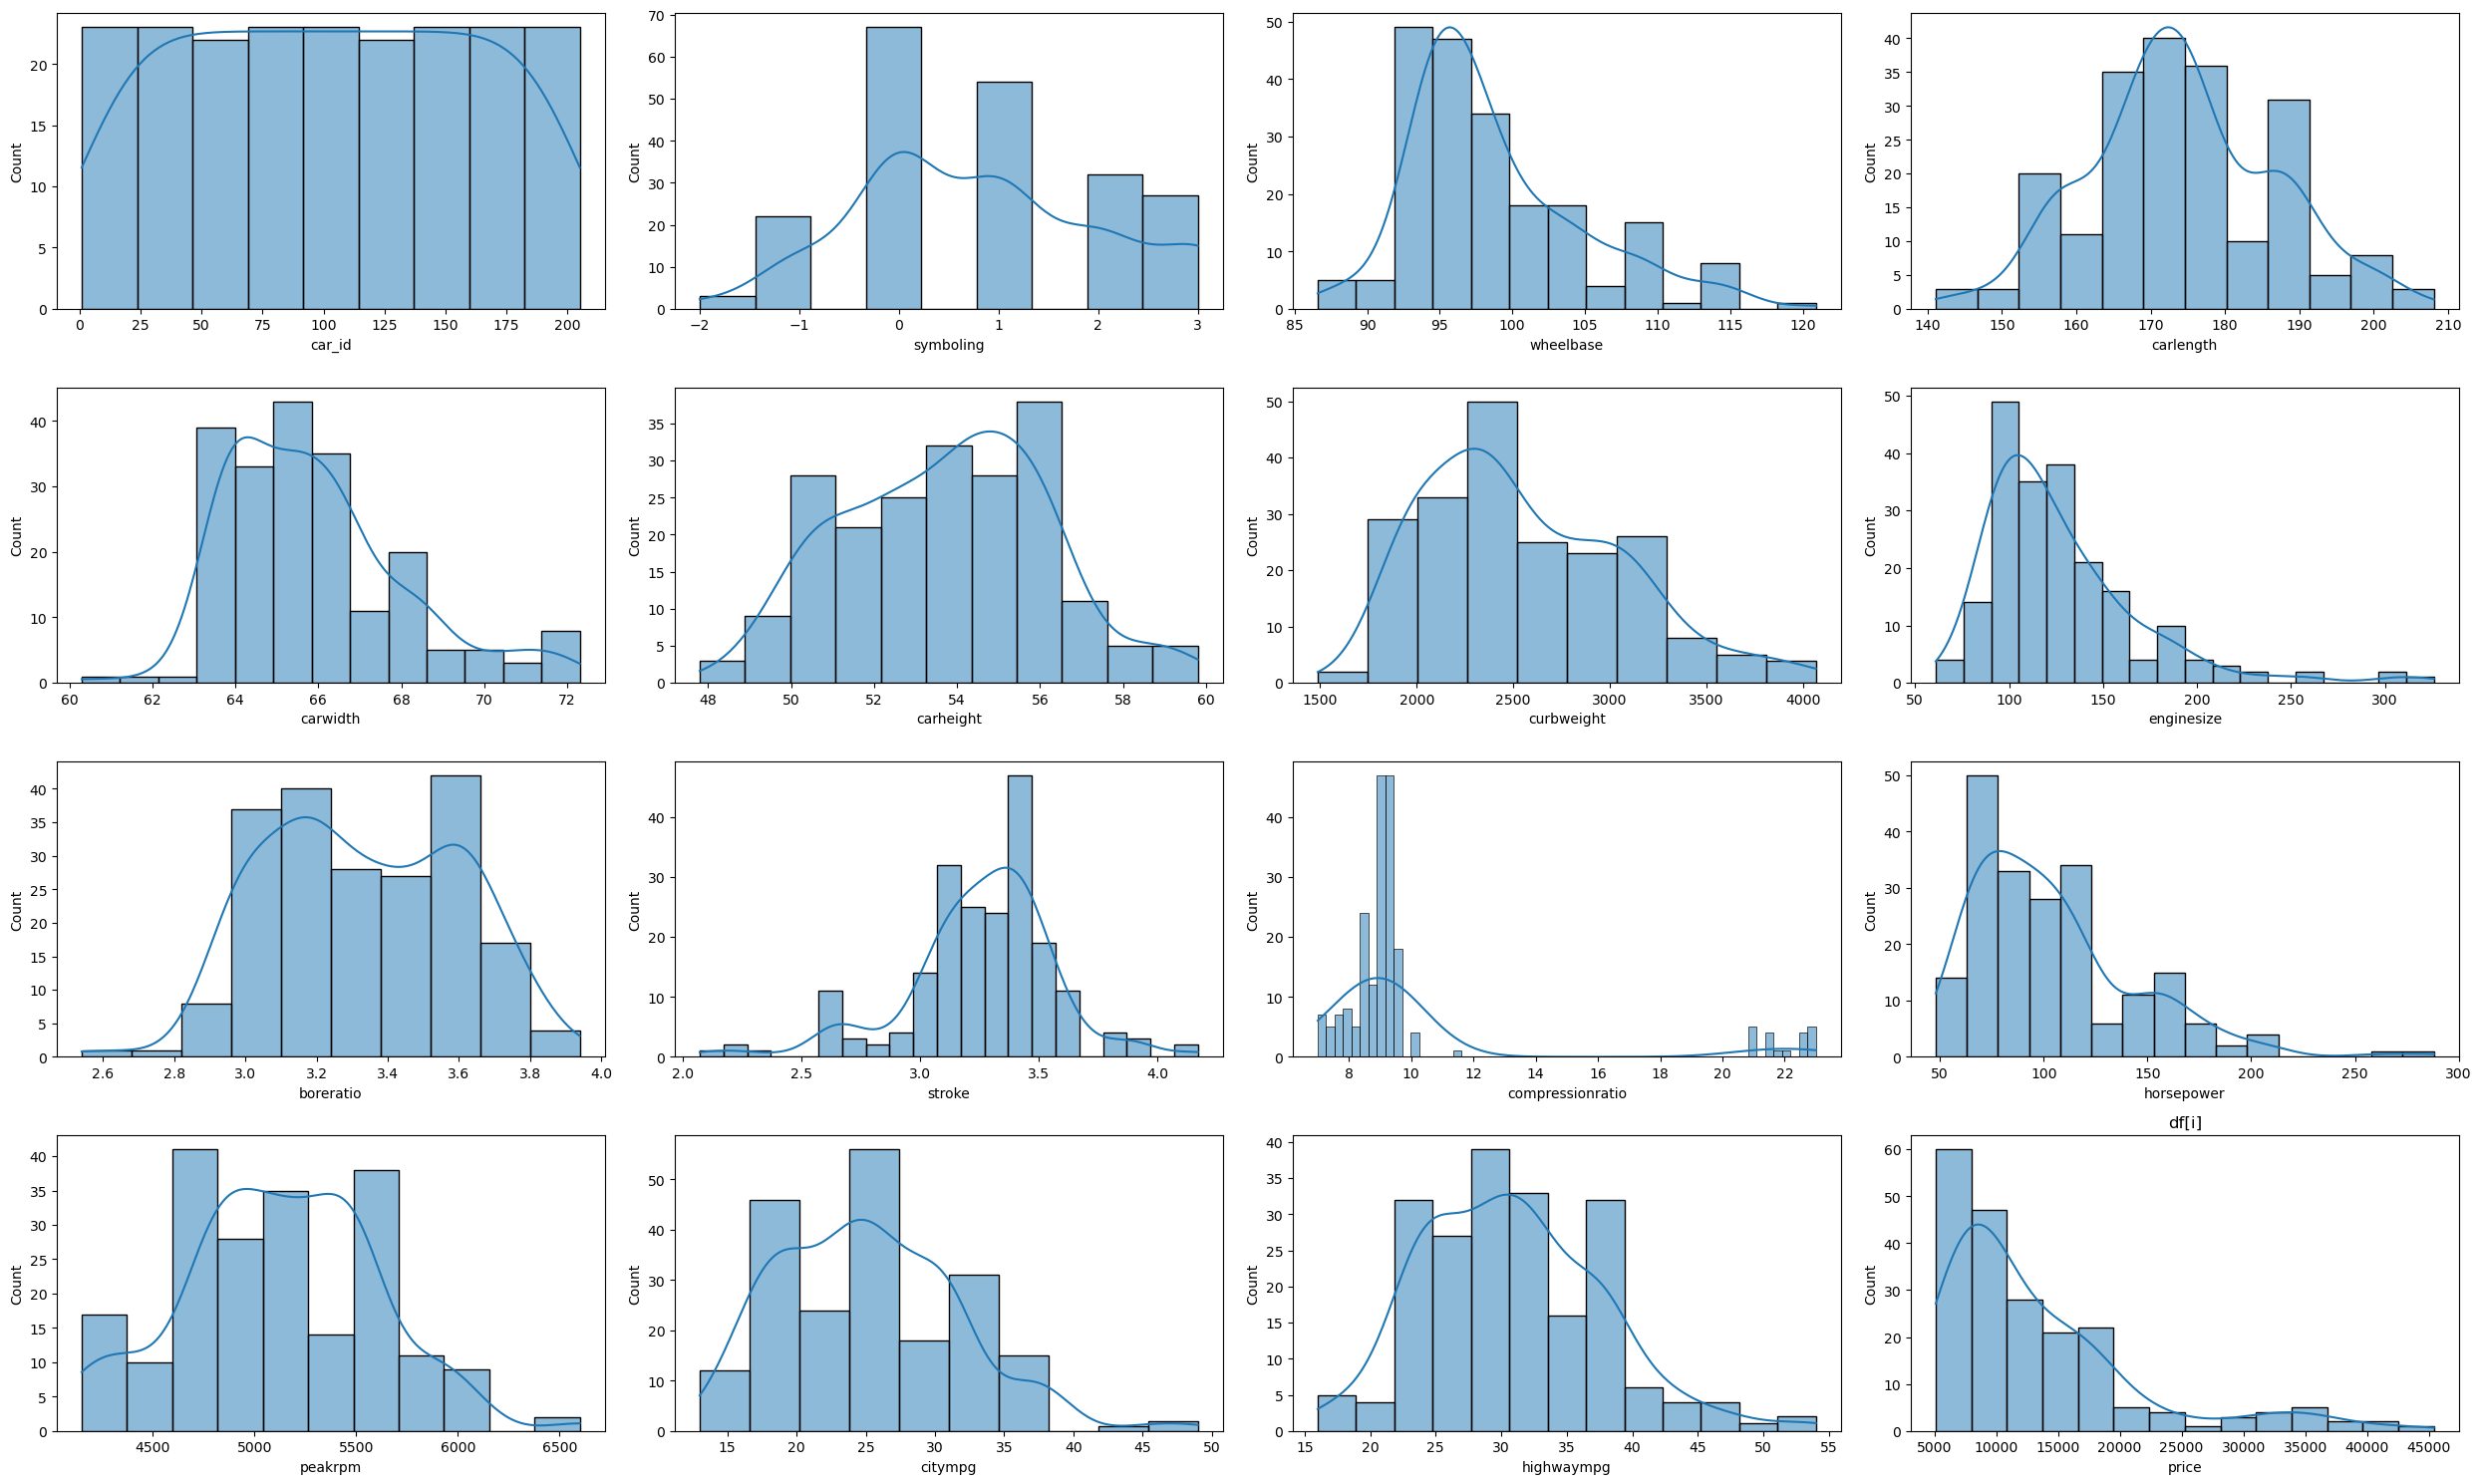

In [161]:
fig, ax= plt.subplots(4,4, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

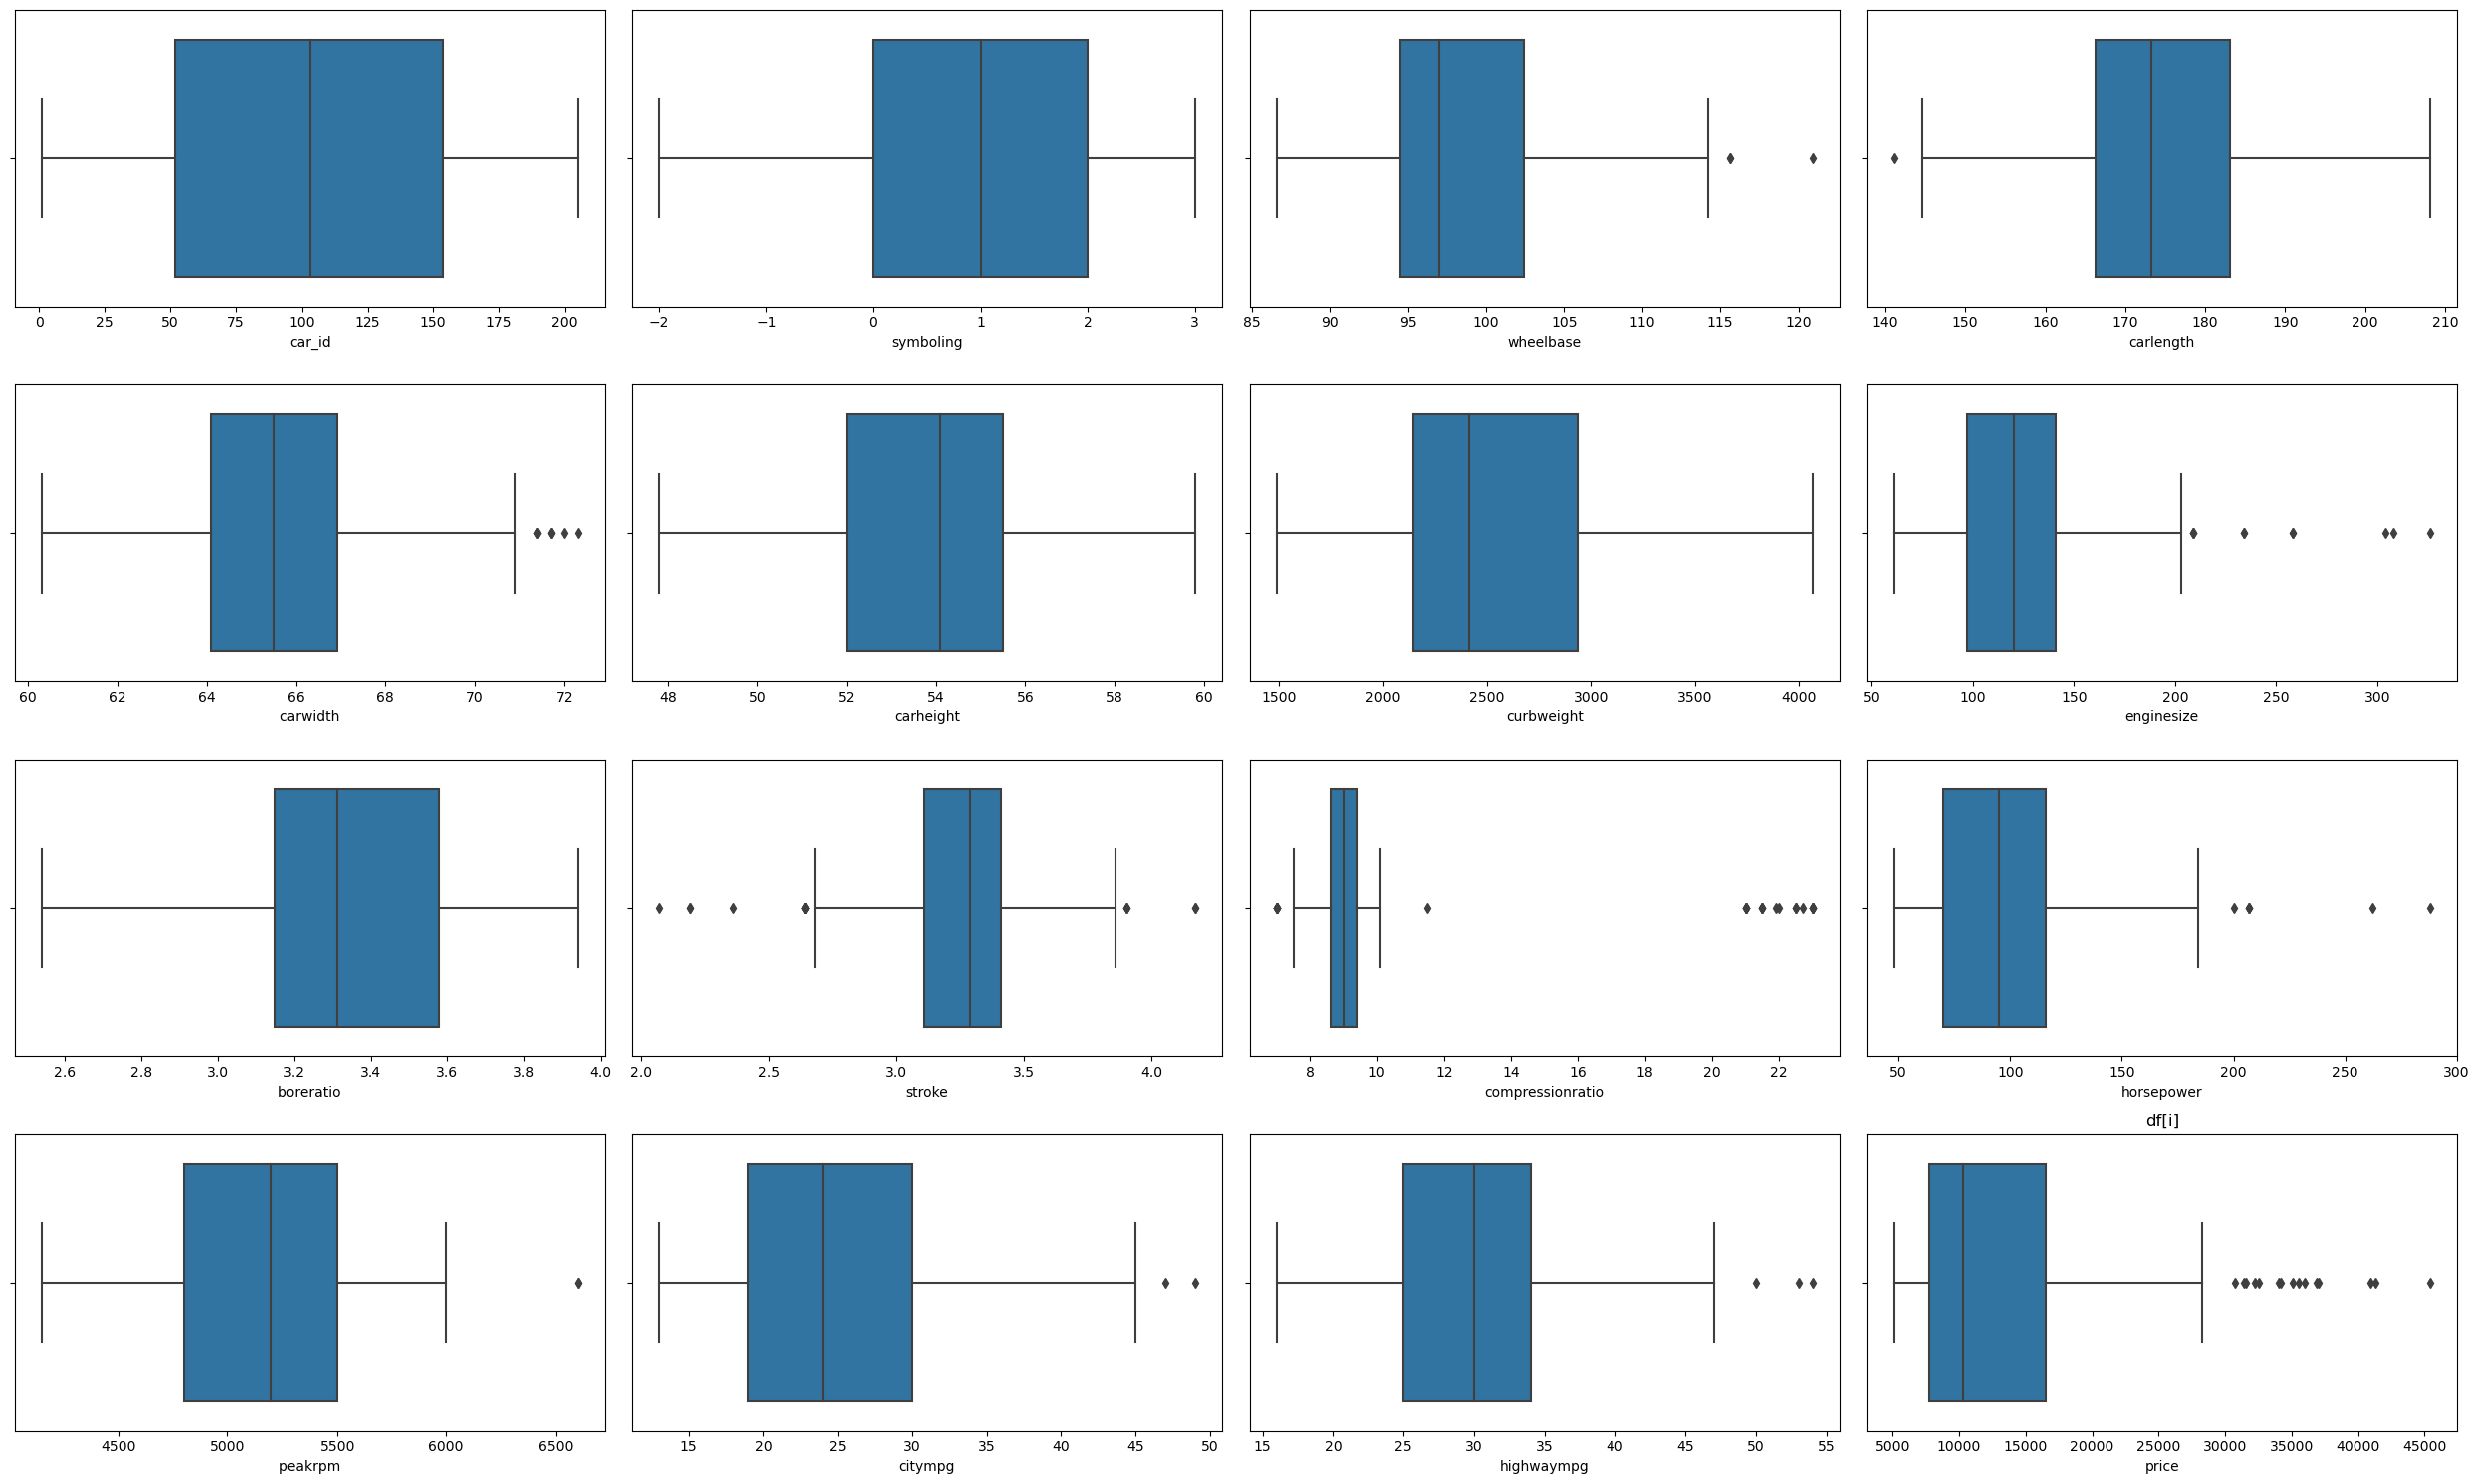

In [162]:
fig, ax= plt.subplots(4,4, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

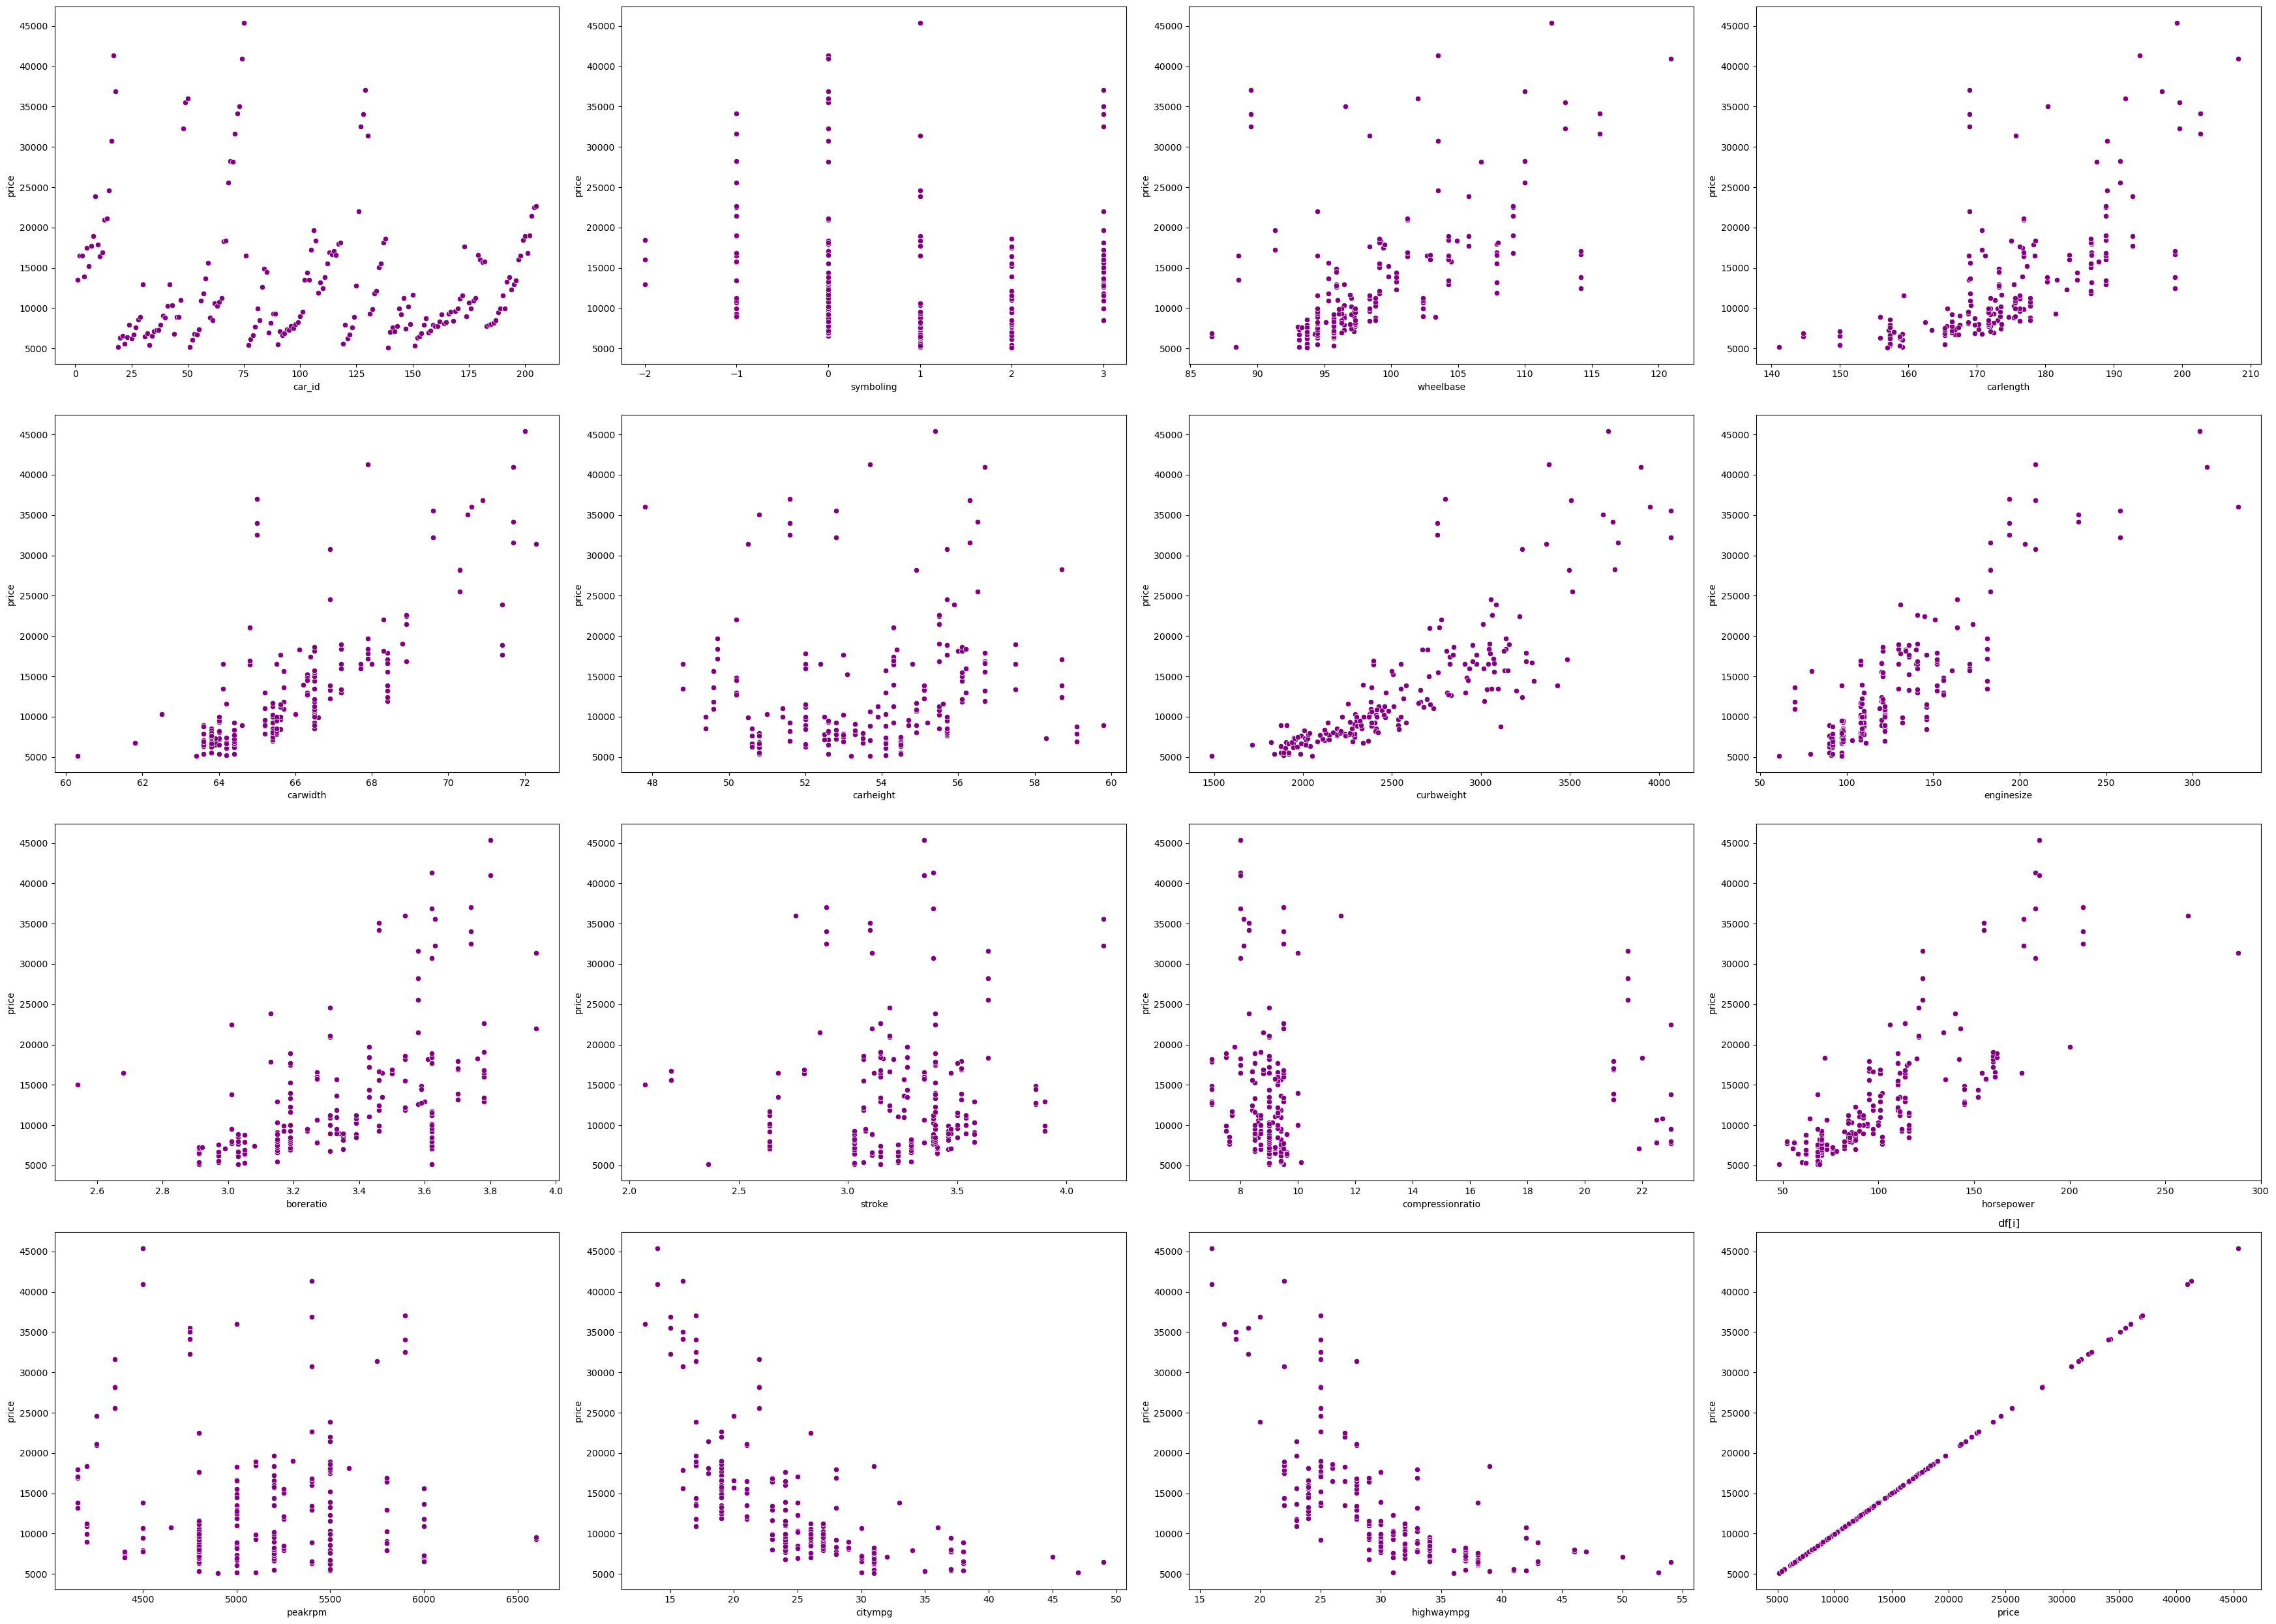

In [163]:
fig, ax= plt.subplots(4,4, figsize=(35,25))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(df[i],df['price'], ax=subplot,color='purple')
    plt.title('df[i]')

plt.tight_layout()
plt.show()

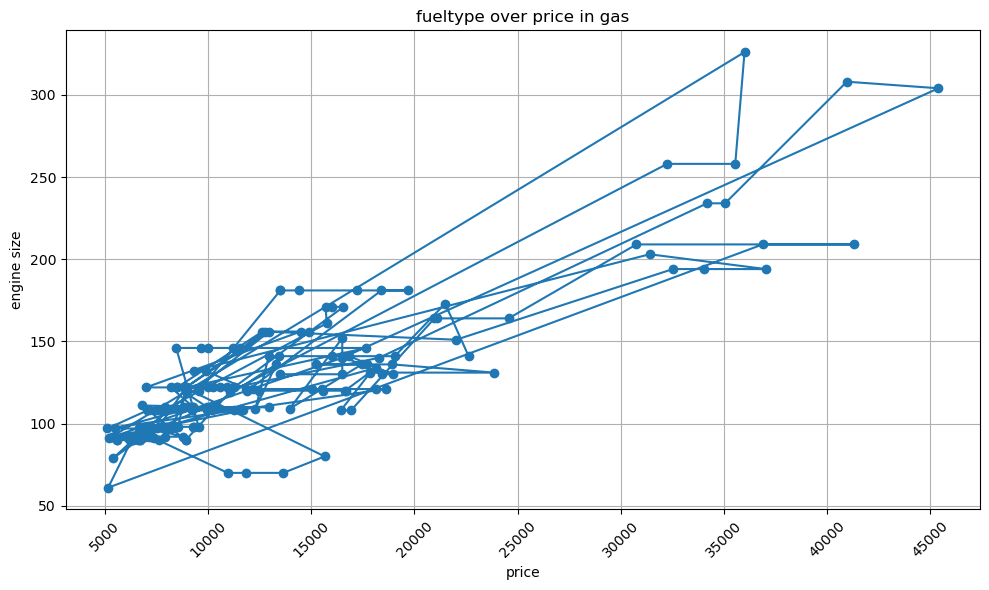

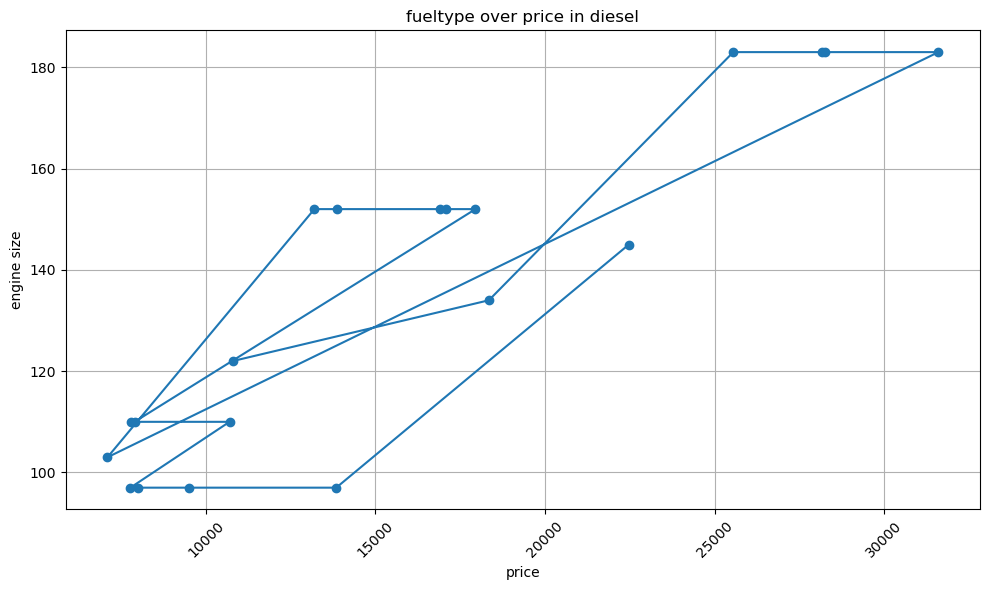

In [164]:
# Line plot showing the trend of Estimated Unemployment Rate (%) over time for a specific Region
# Get unique regions in the DataFrame
unique_fuel = df['fueltype'].unique()

# Loop through each region and create separate line plots
for region_to_plot in unique_fuel:
    data_fuel = df[df['fueltype'] == region_to_plot]
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_fuel['price'], data_fuel['enginesize'], marker='o')
    plt.xlabel('price')
    plt.ylabel('engine size')
    plt.title(f'fueltype over price in {region_to_plot}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

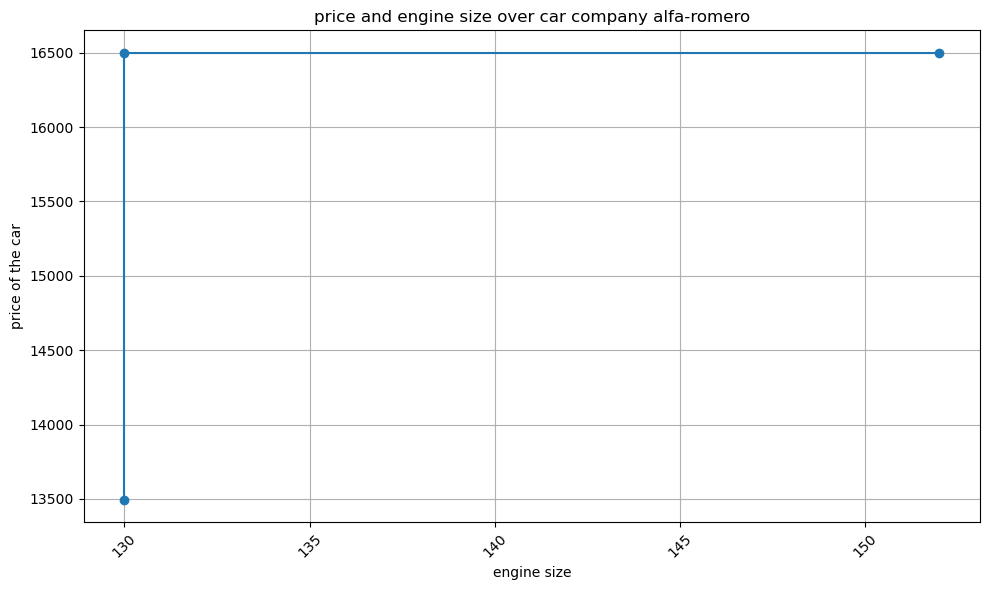

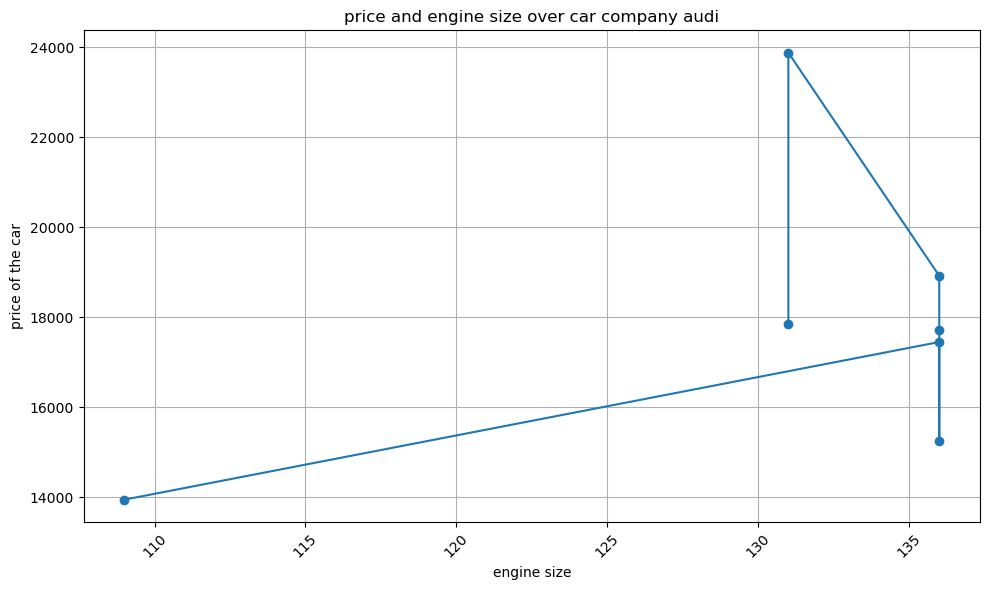

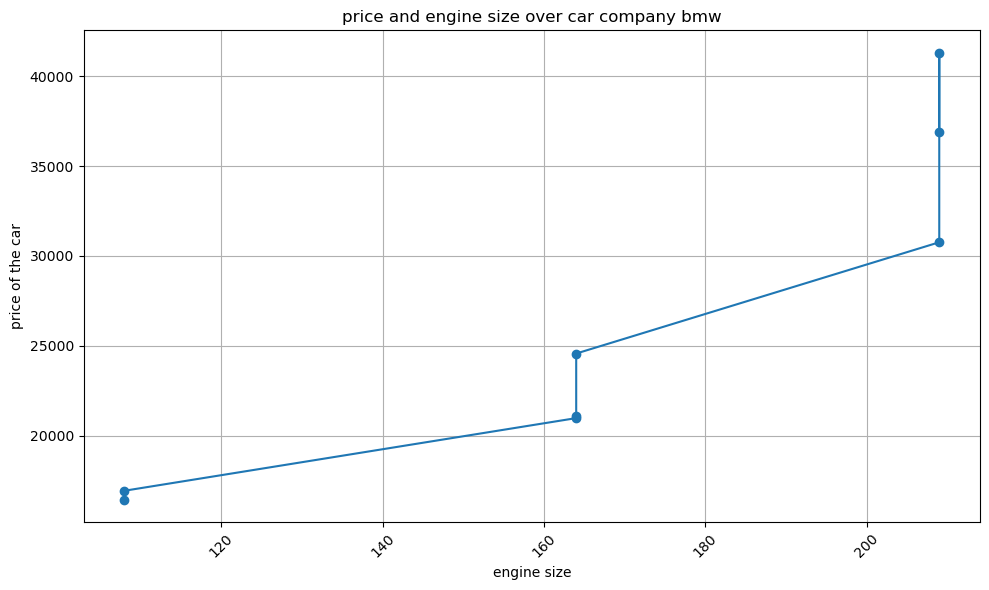

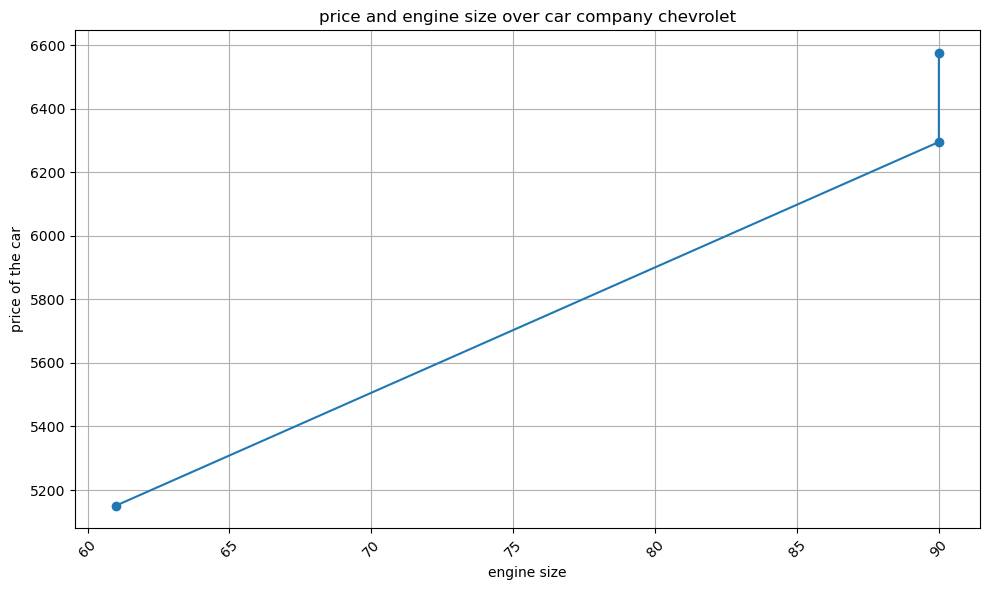

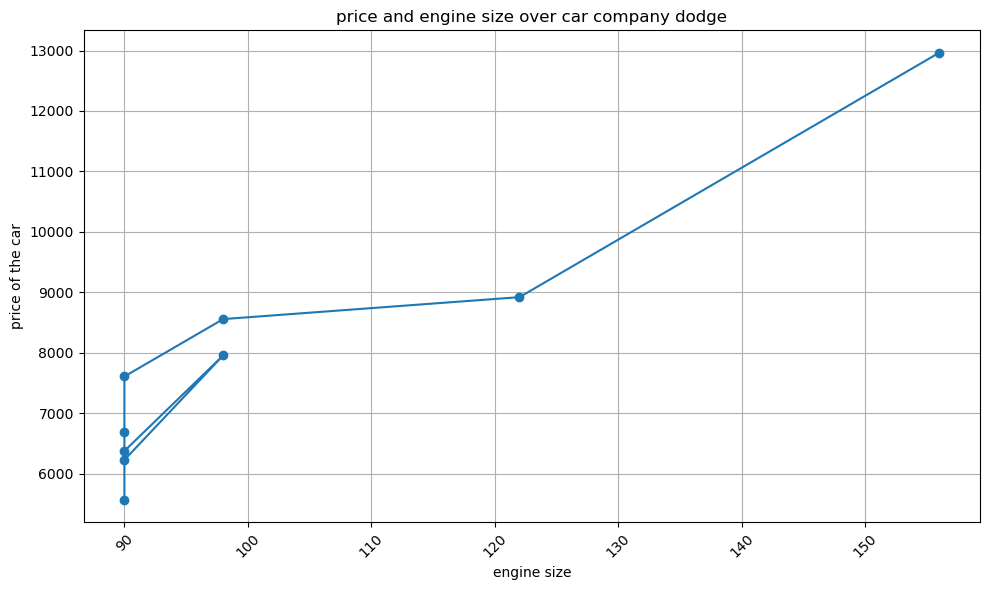

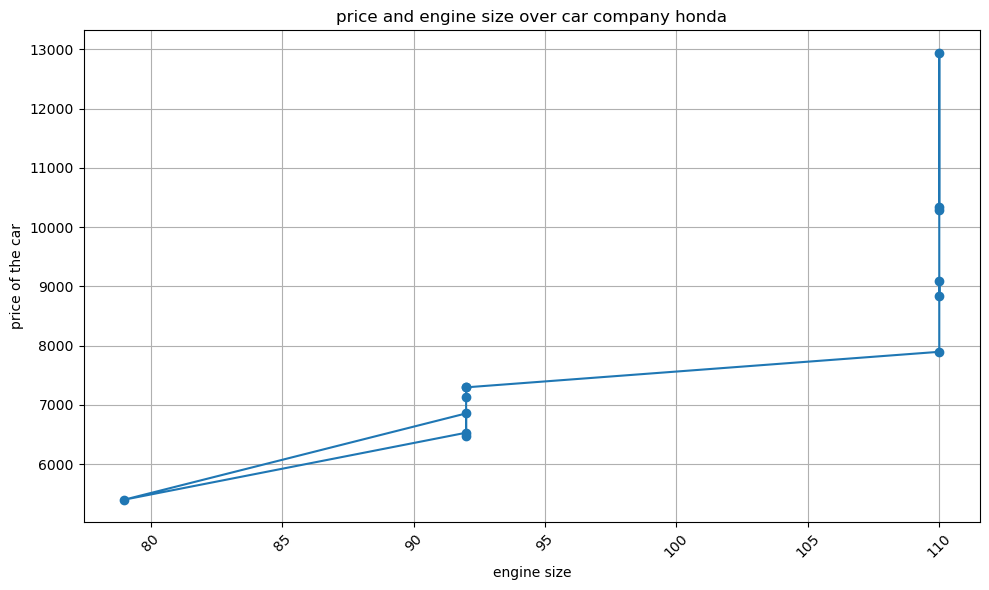

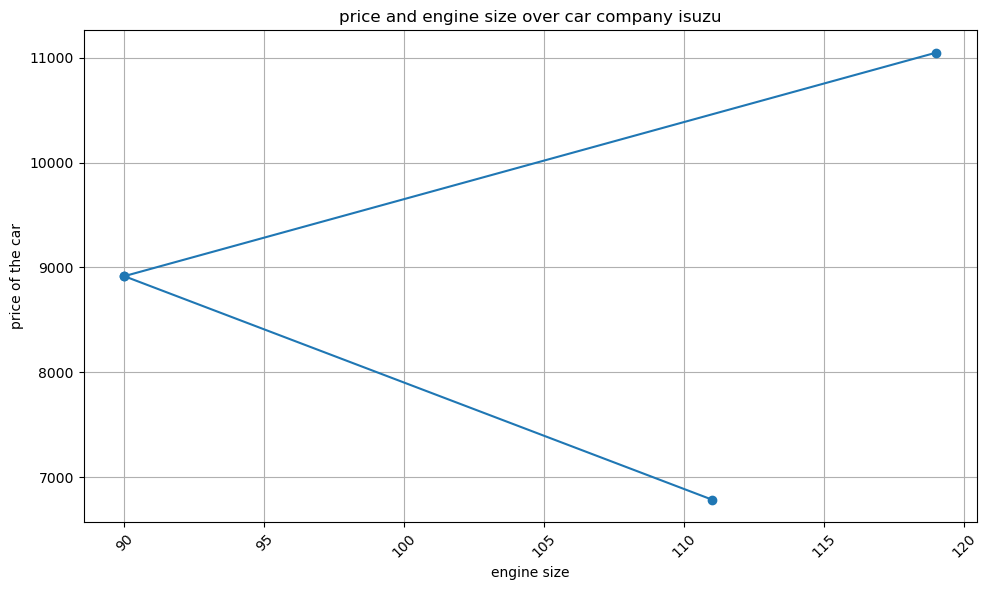

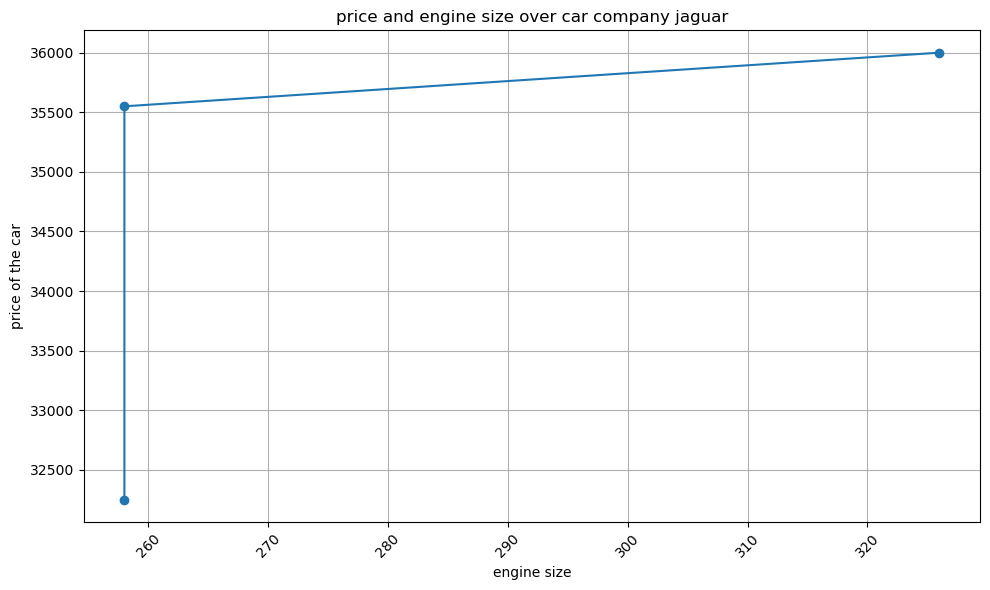

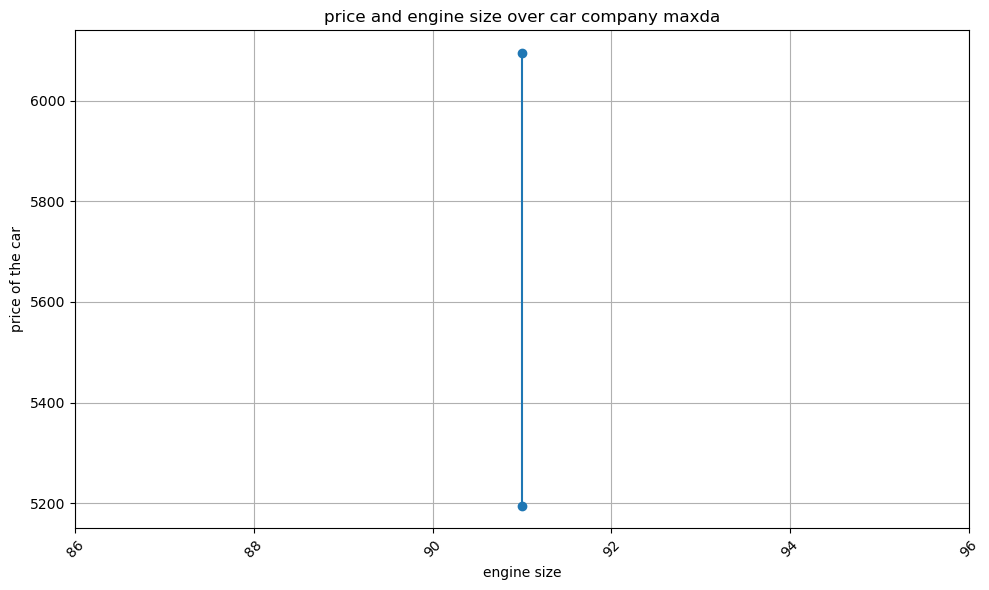

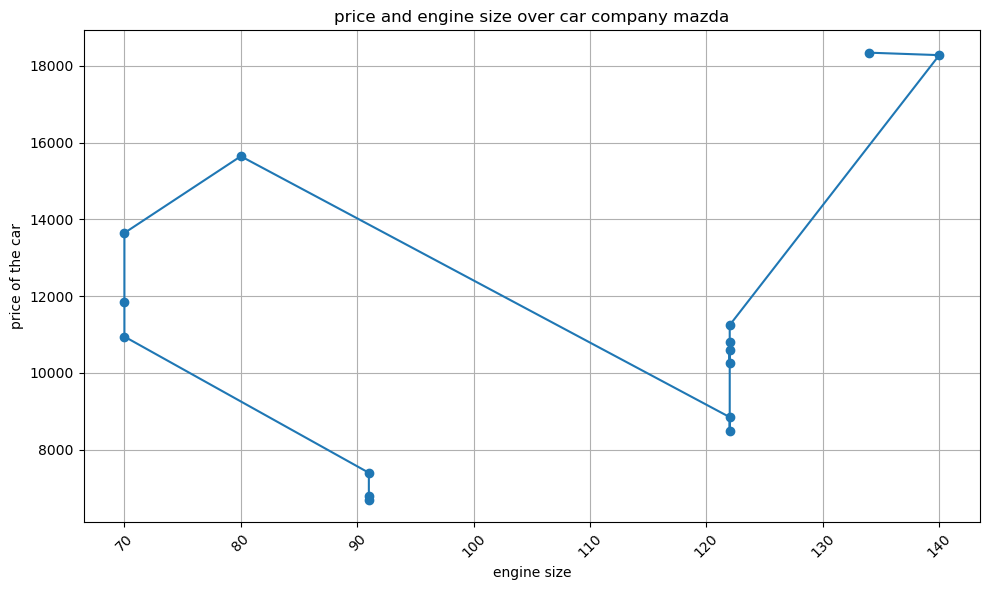

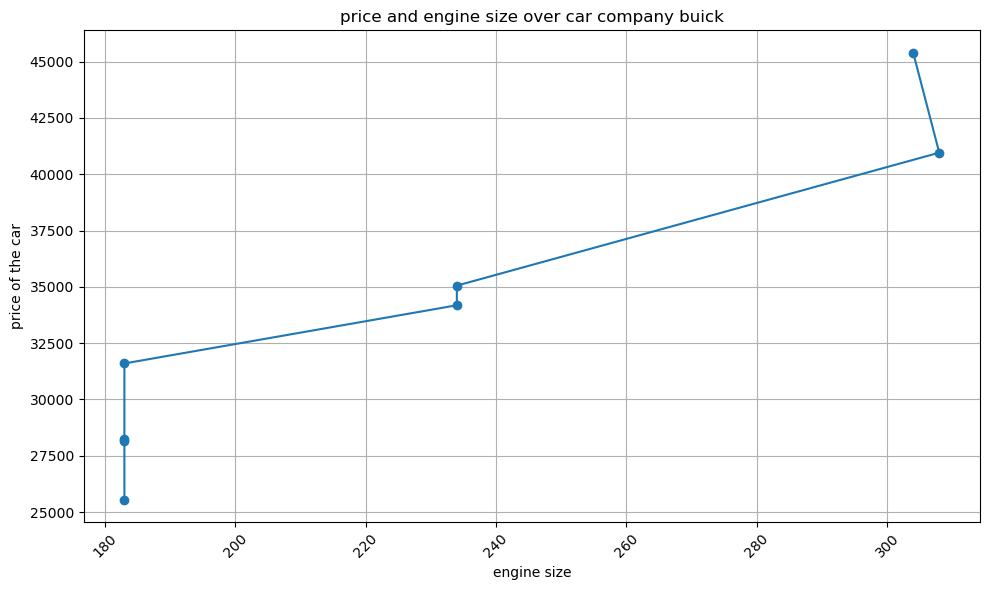

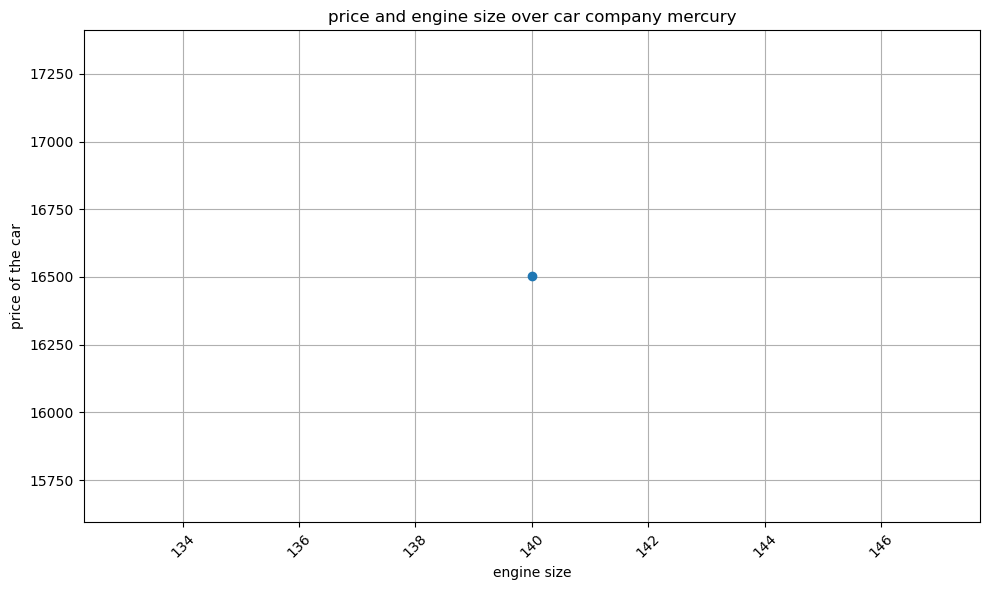

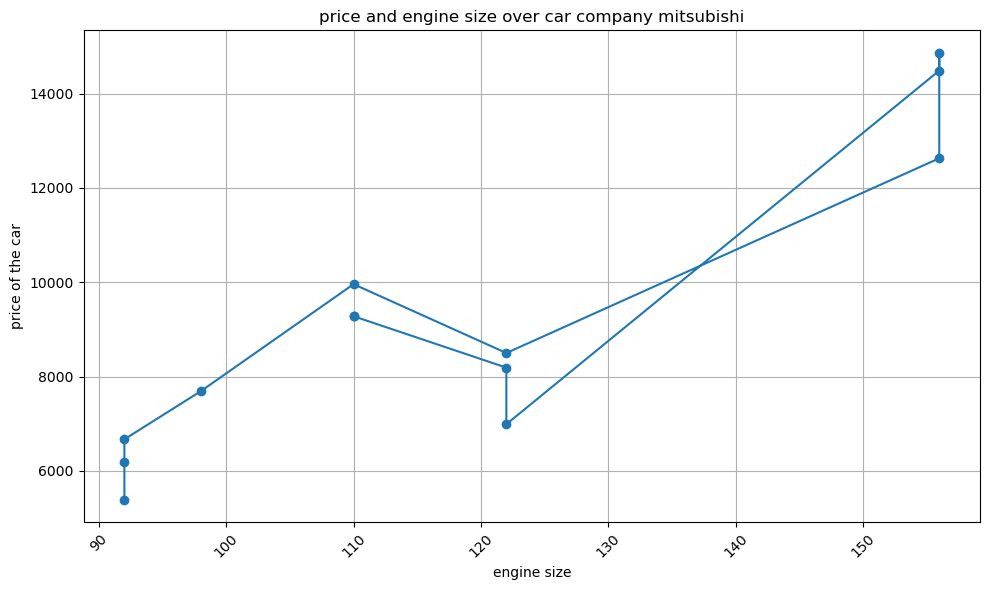

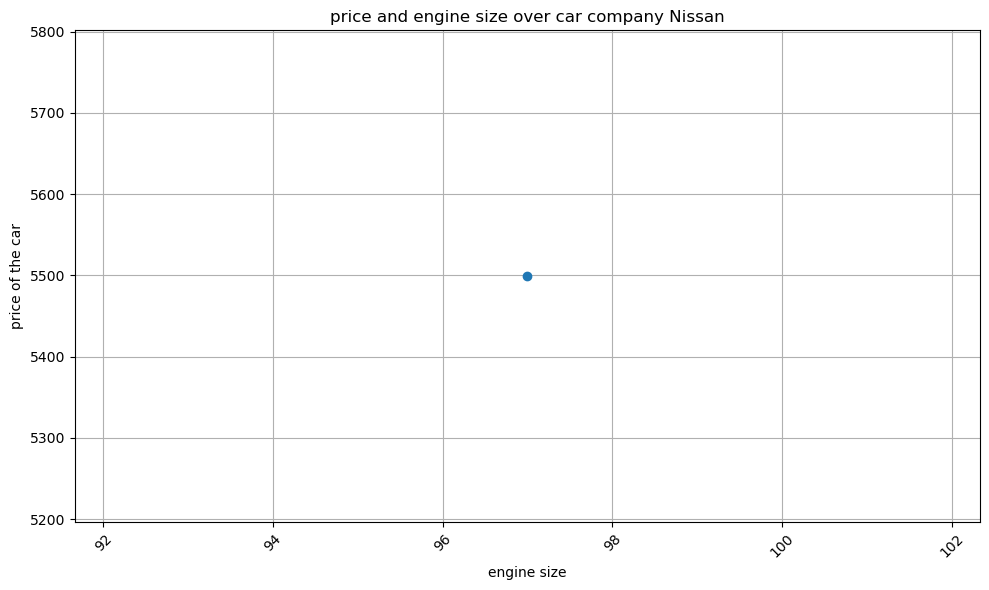

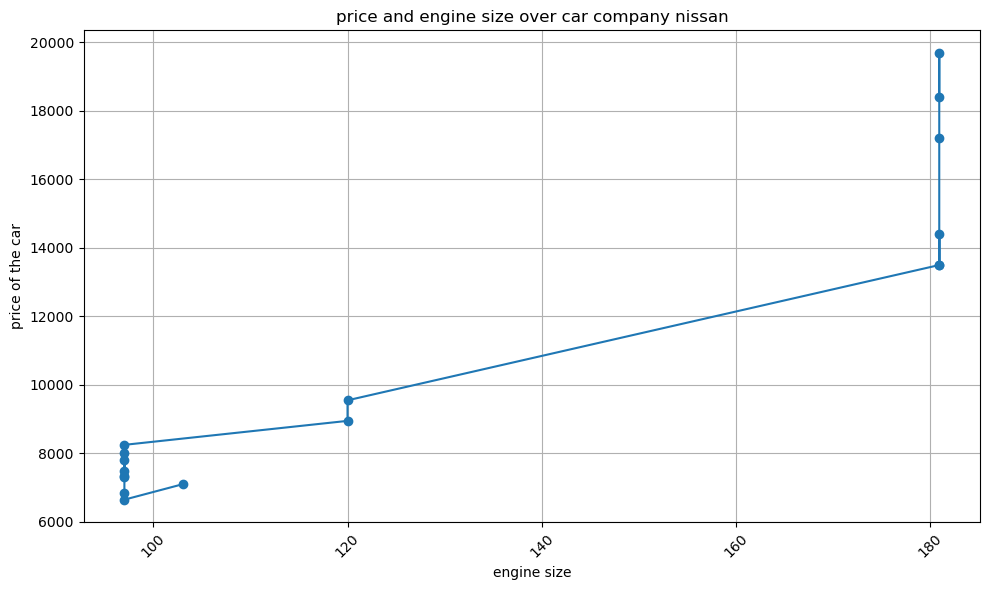

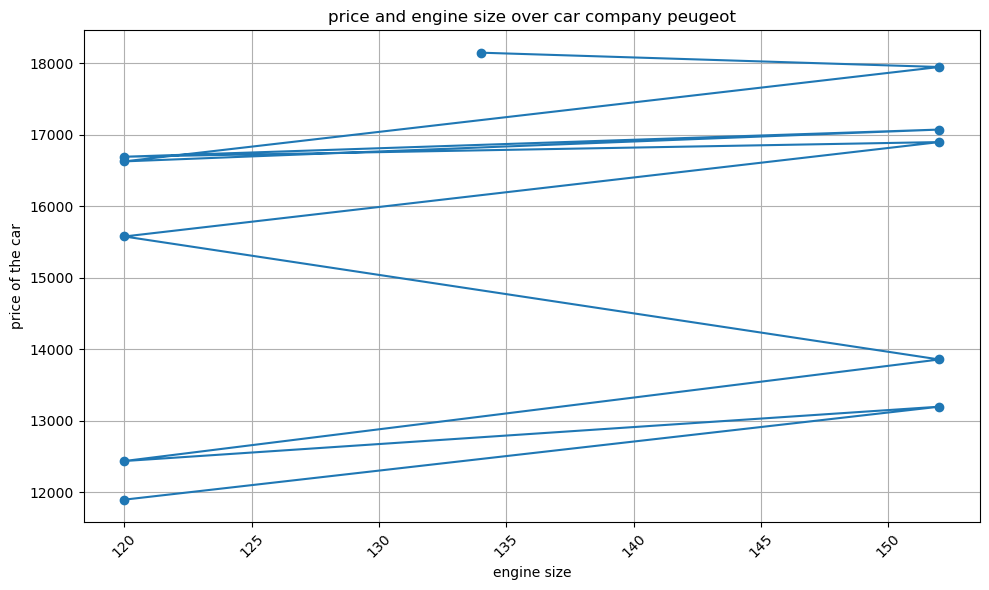

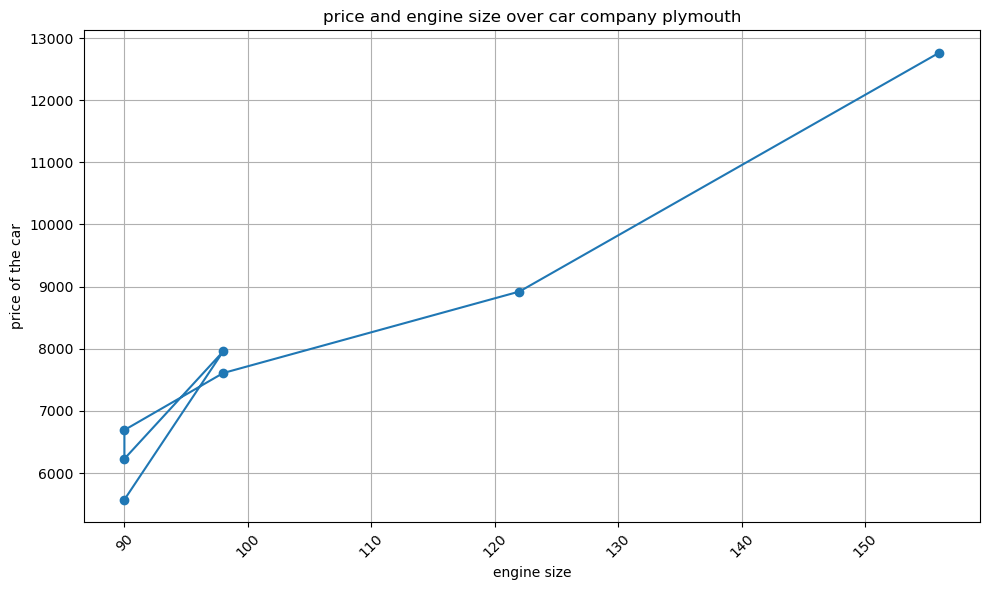

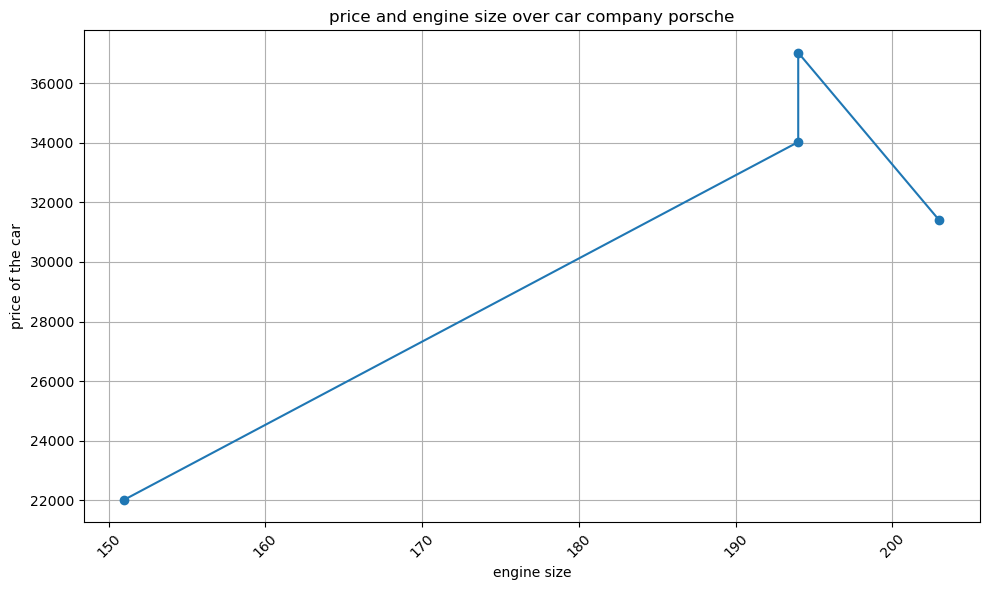

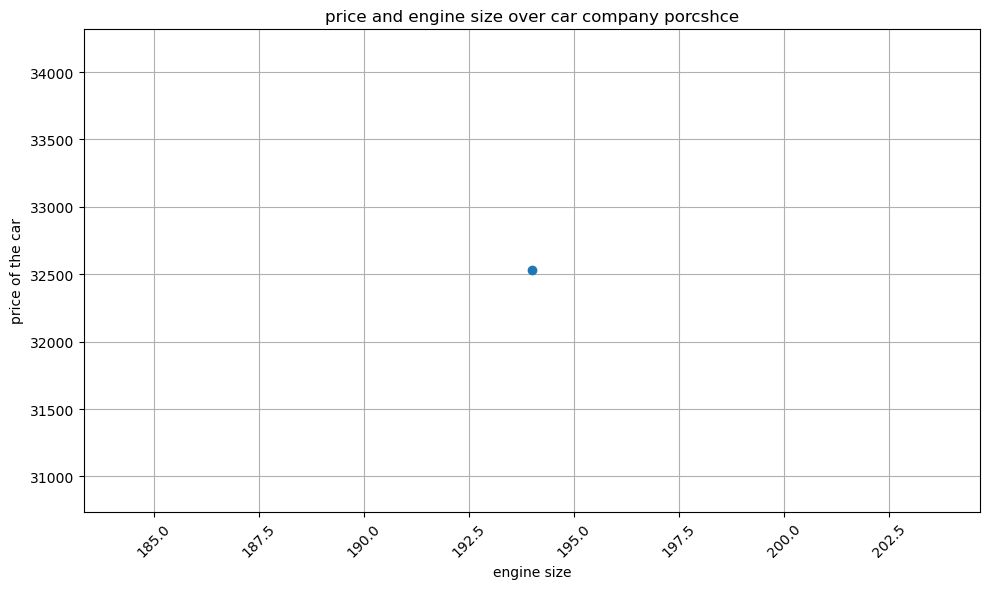

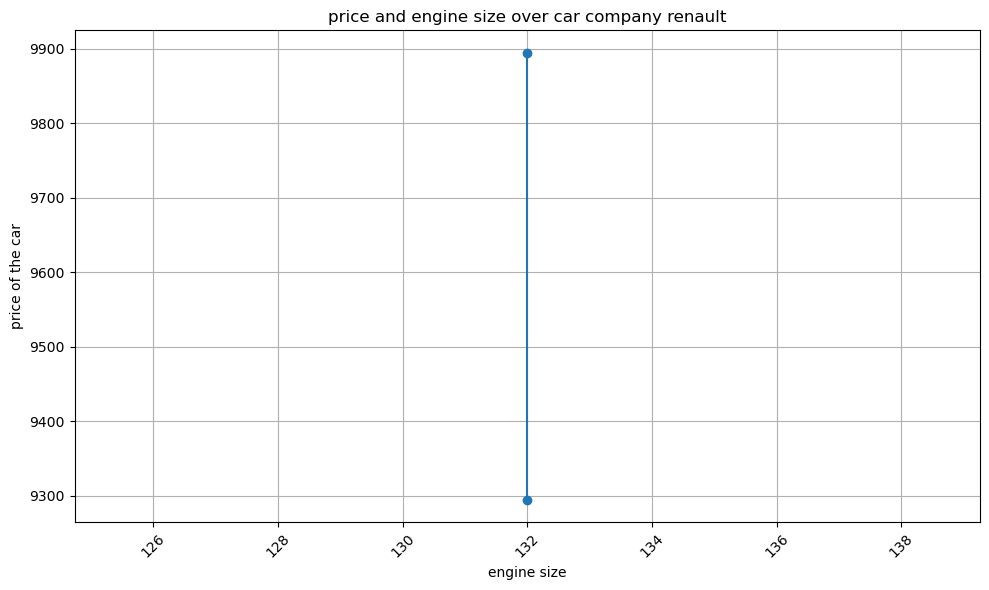

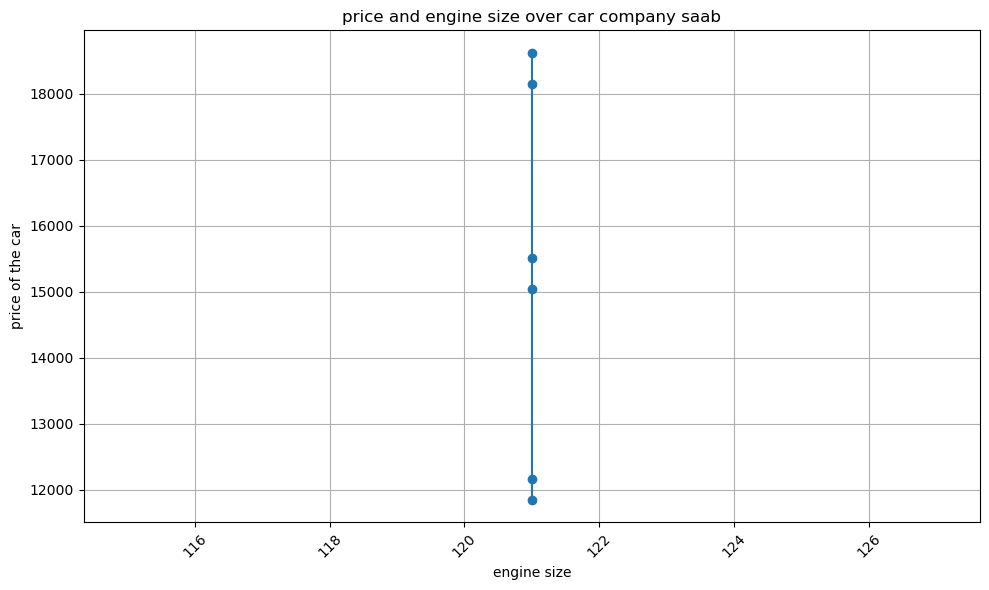

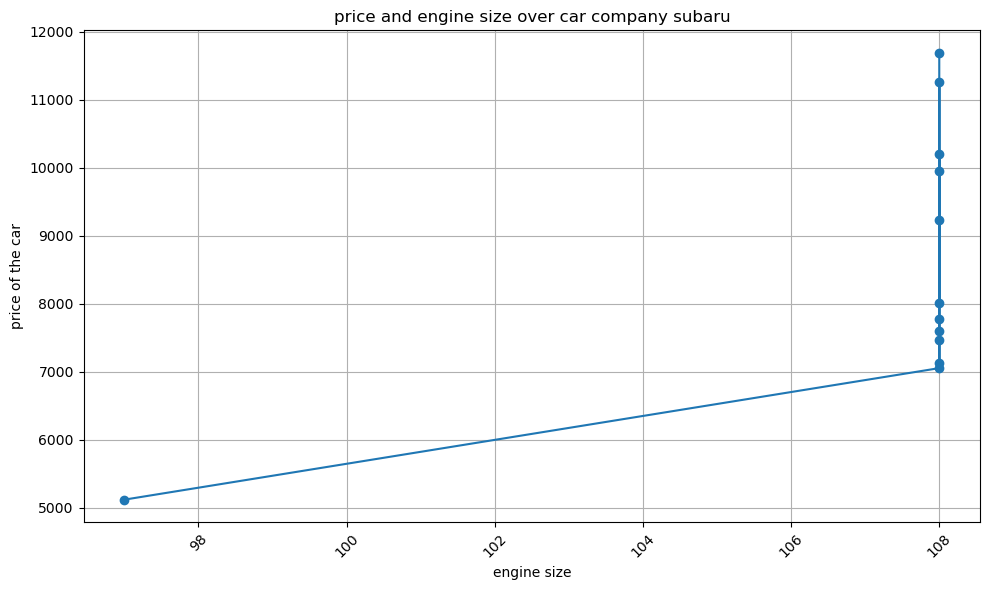

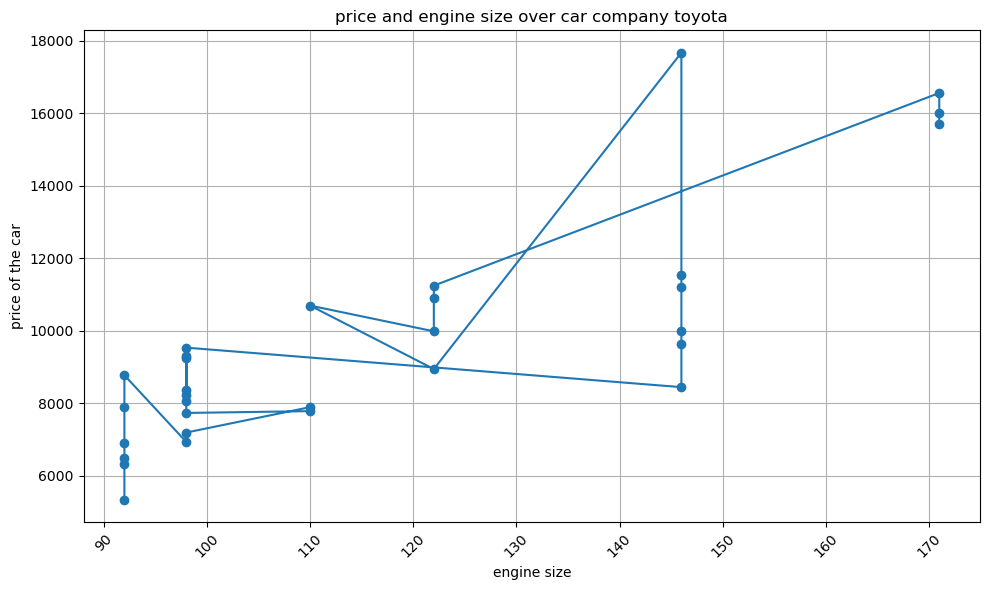

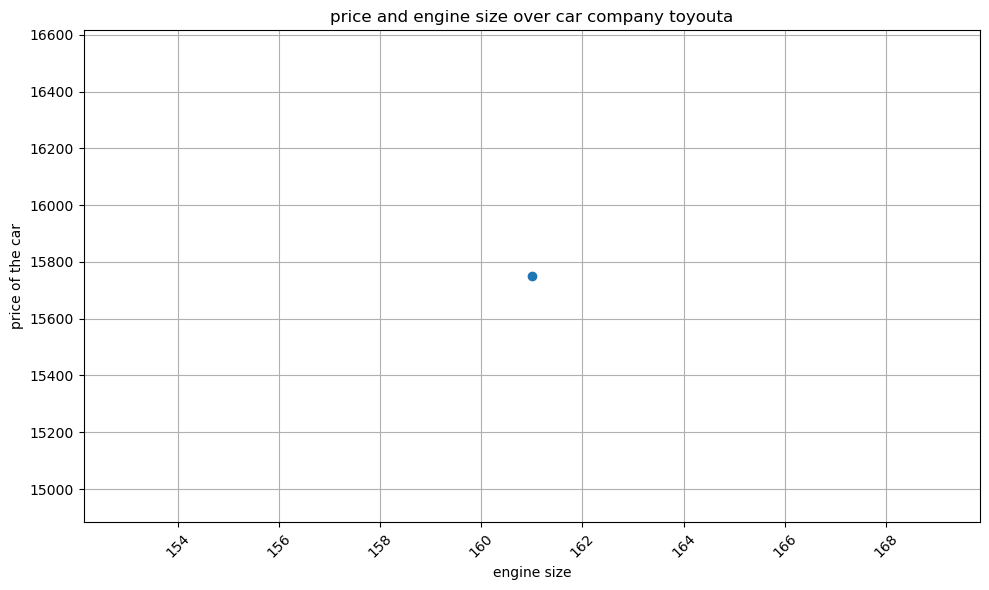

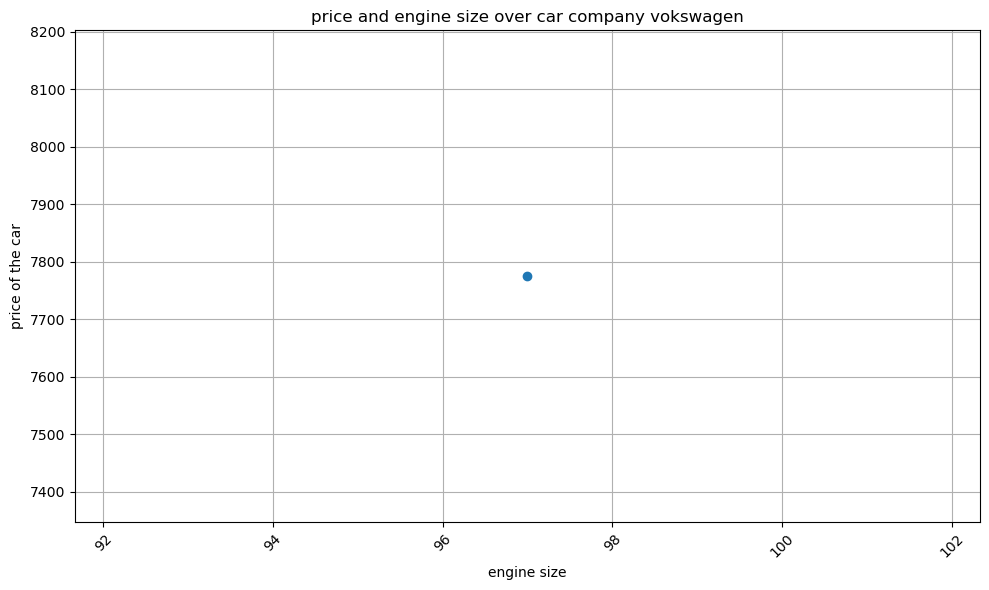

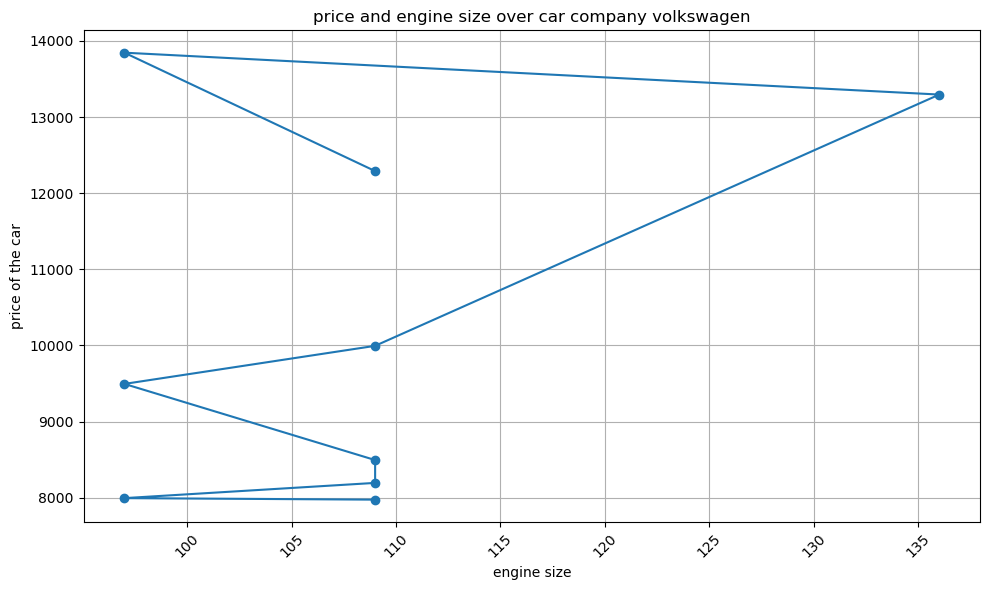

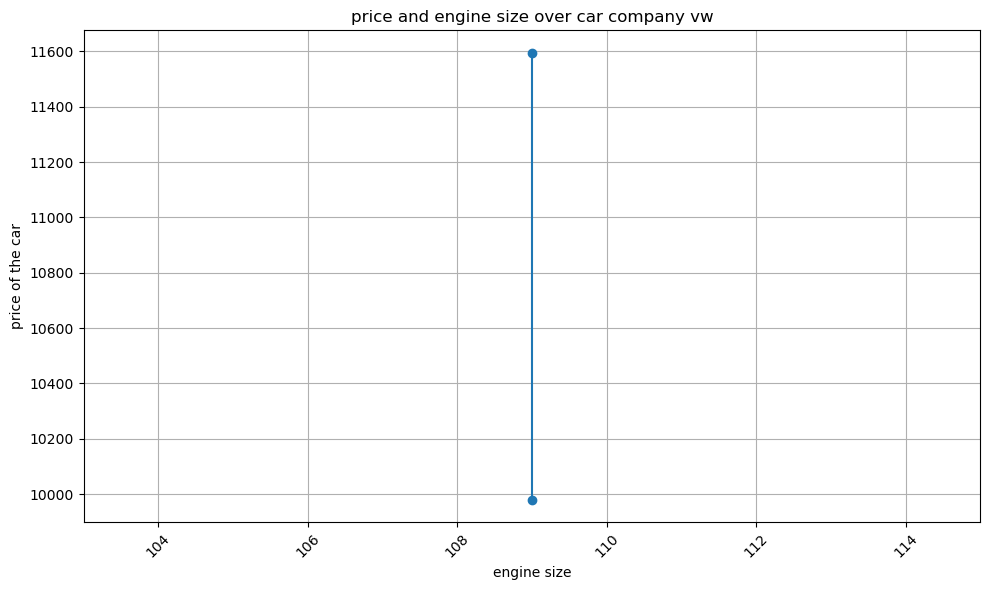

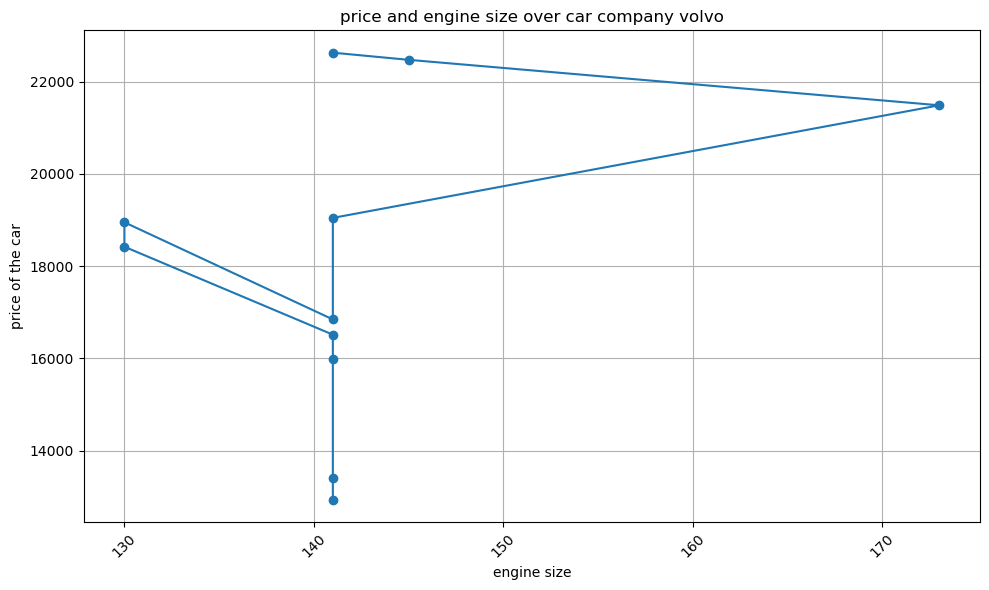

In [165]:
# Get unique regions in the DataFrame
unique_fuel = df['company'].unique()

# Loop through each region and create separate line plots
for region_to_plot in unique_fuel:
    data_fuel = df[df['company'] == region_to_plot]
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_fuel['enginesize'], data_fuel['price'], marker='o')
    plt.xlabel('engine size')
    plt.ylabel('price of the car')
    plt.title(f'price and engine size over car company {region_to_plot}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

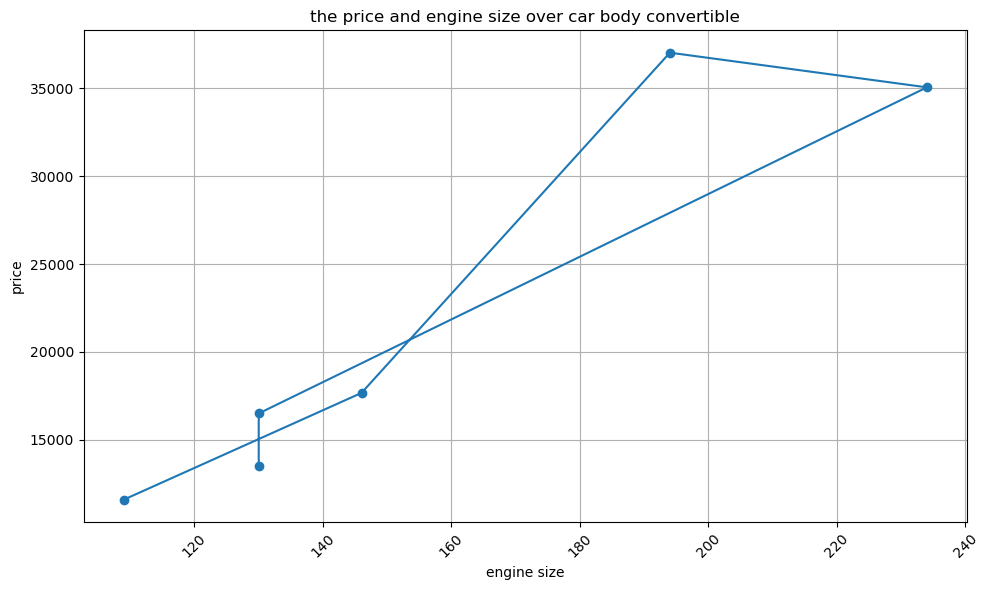

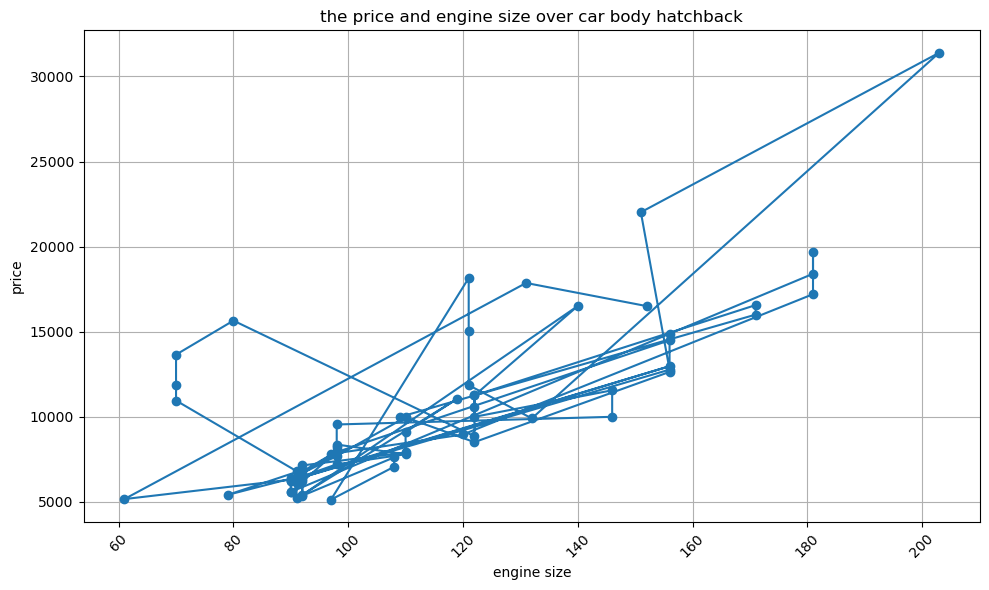

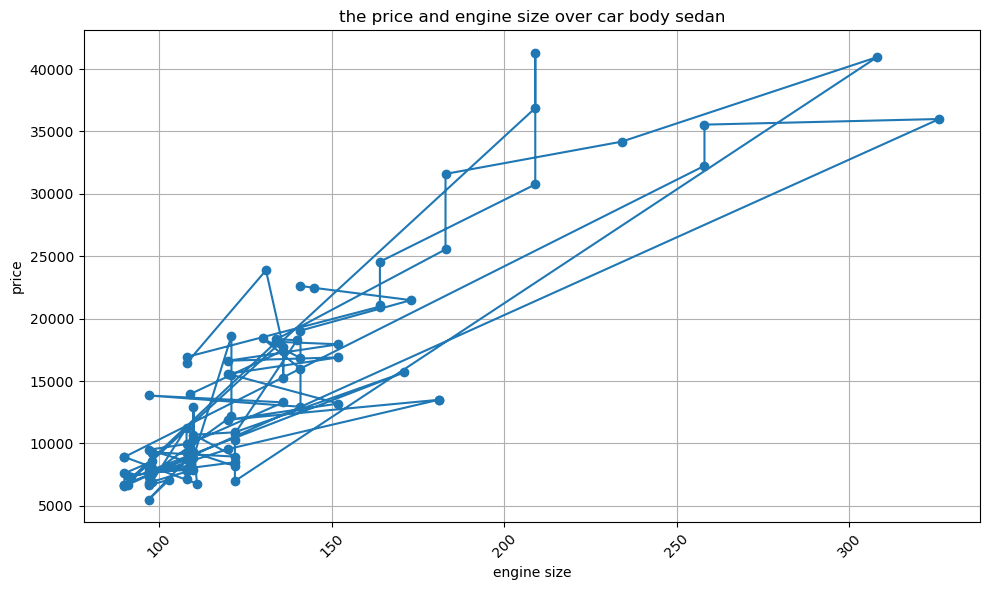

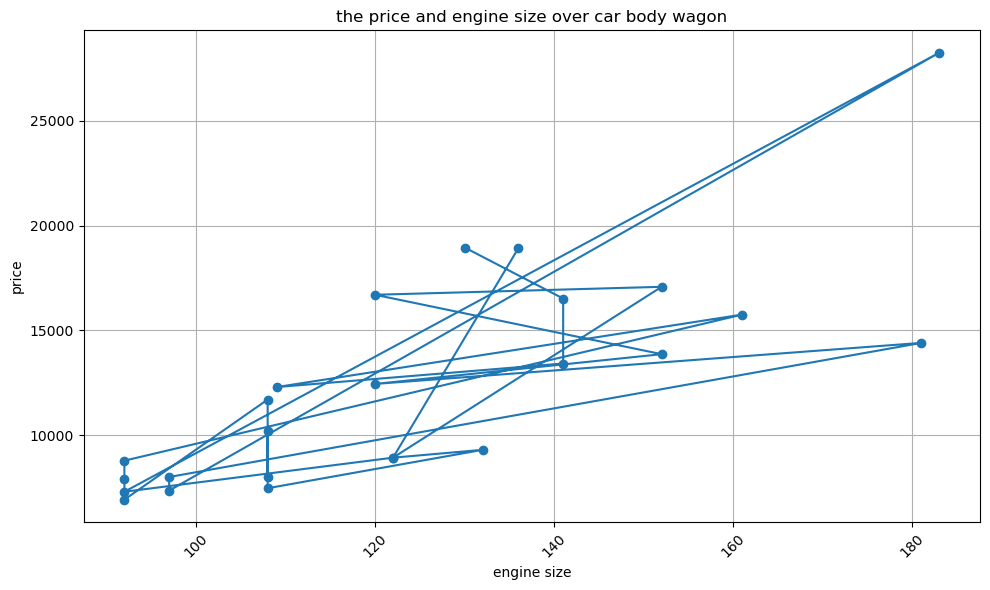

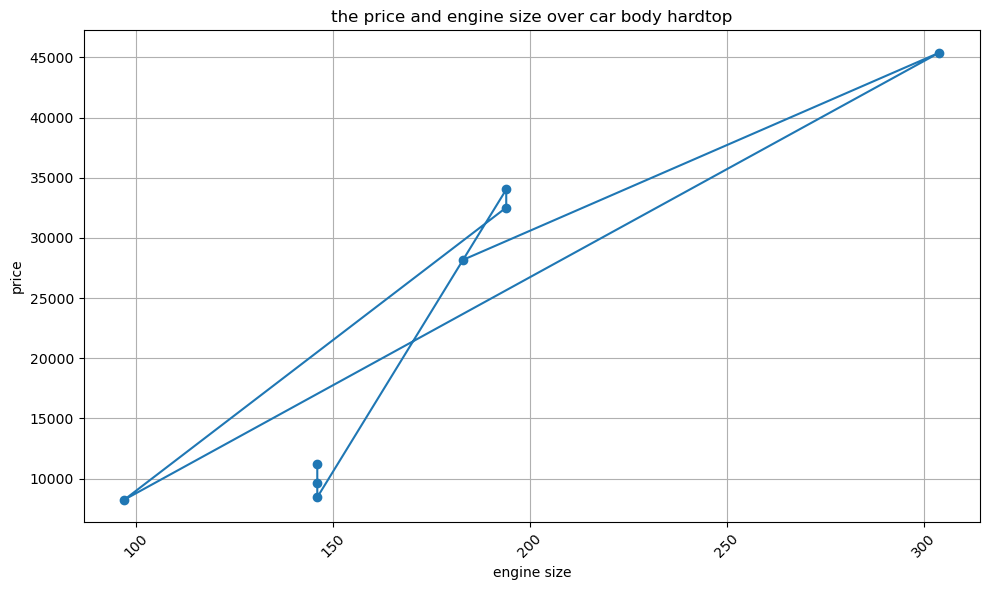

In [166]:
# Get unique regions in the DataFrame
unique_fuel = df['carbody'].unique()

# Loop through each region and create separate line plots
for region_to_plot in unique_fuel:
    data_fuel = df[df['carbody'] == region_to_plot]
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_fuel['enginesize'], data_fuel['price'], marker='o')
    plt.xlabel('engine size')
    plt.ylabel('price')
    plt.title(f'the price and engine size over car body {region_to_plot}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [167]:
cat_columns = df_cat.columns
cat_columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company', 'model'],
      dtype='object')

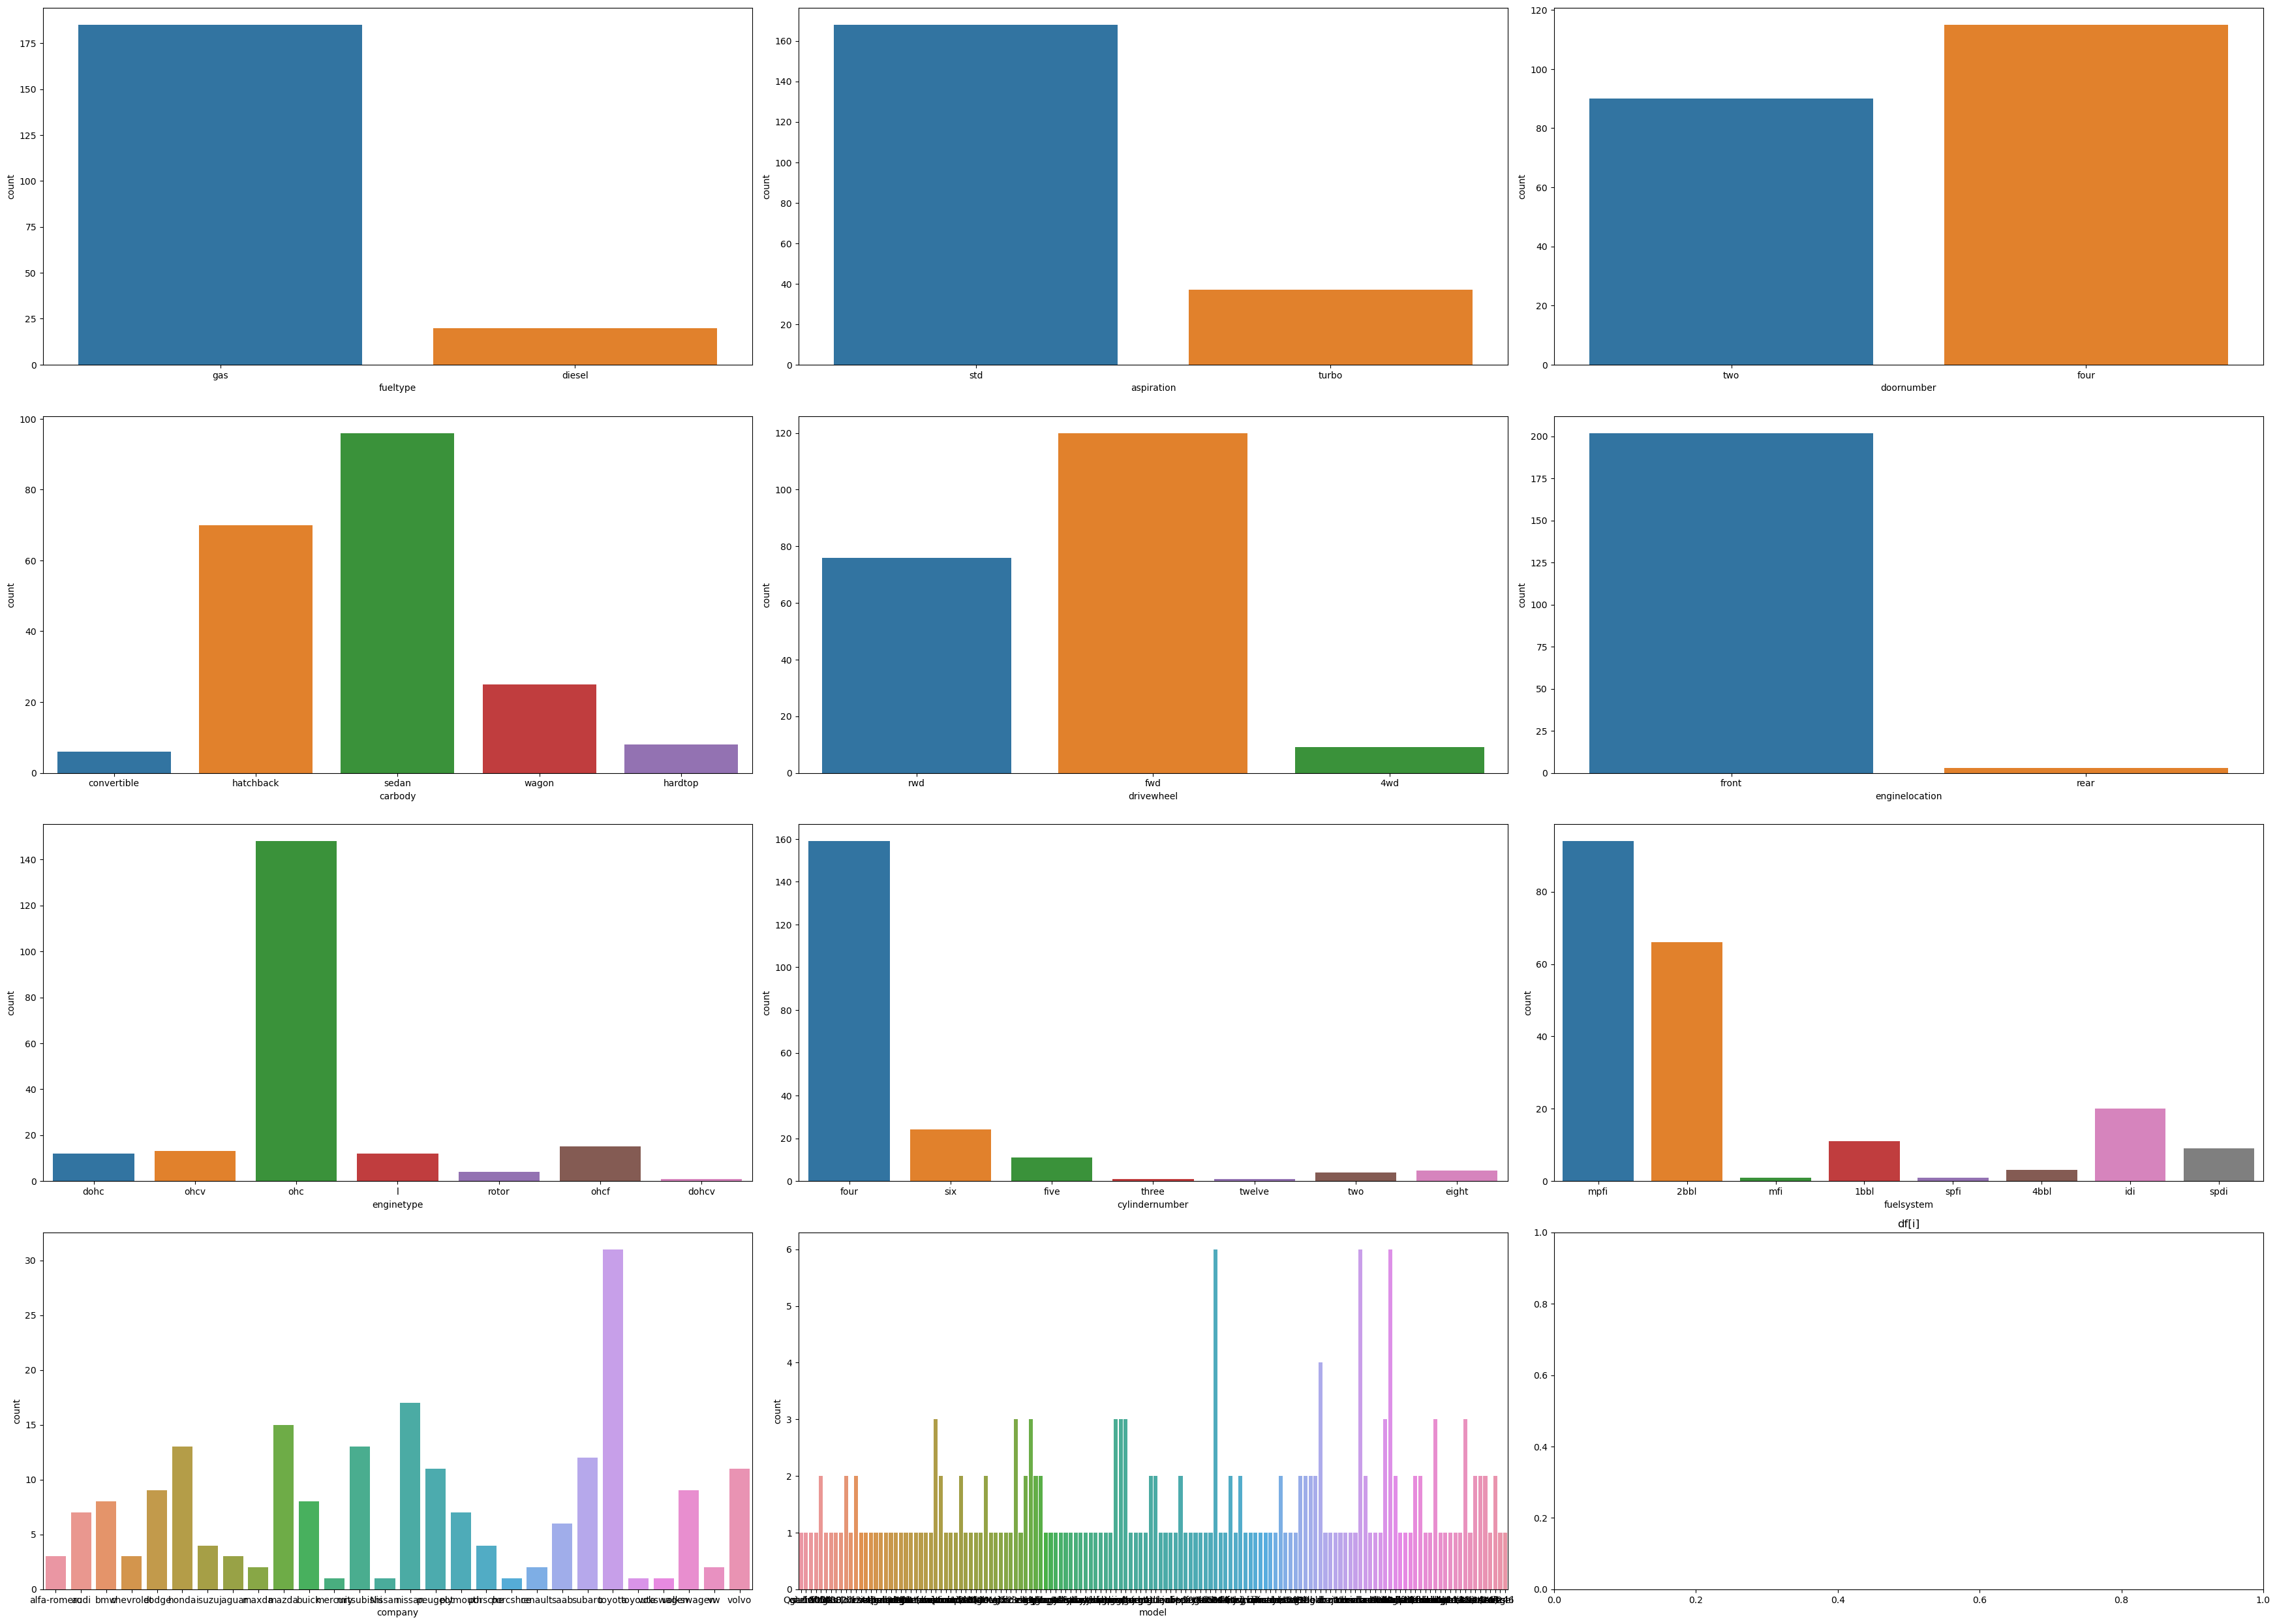

In [168]:
fig, ax= plt.subplots(4,3, figsize=(35,25))

for i, subplot in zip(cat_columns, ax.flatten()):
    sns.countplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

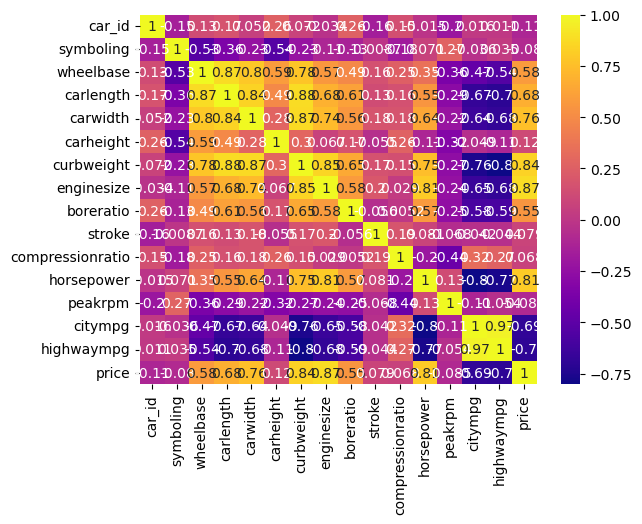

In [169]:
sns.heatmap(df_num.corr(),annot=True,cmap="plasma")
plt.show()

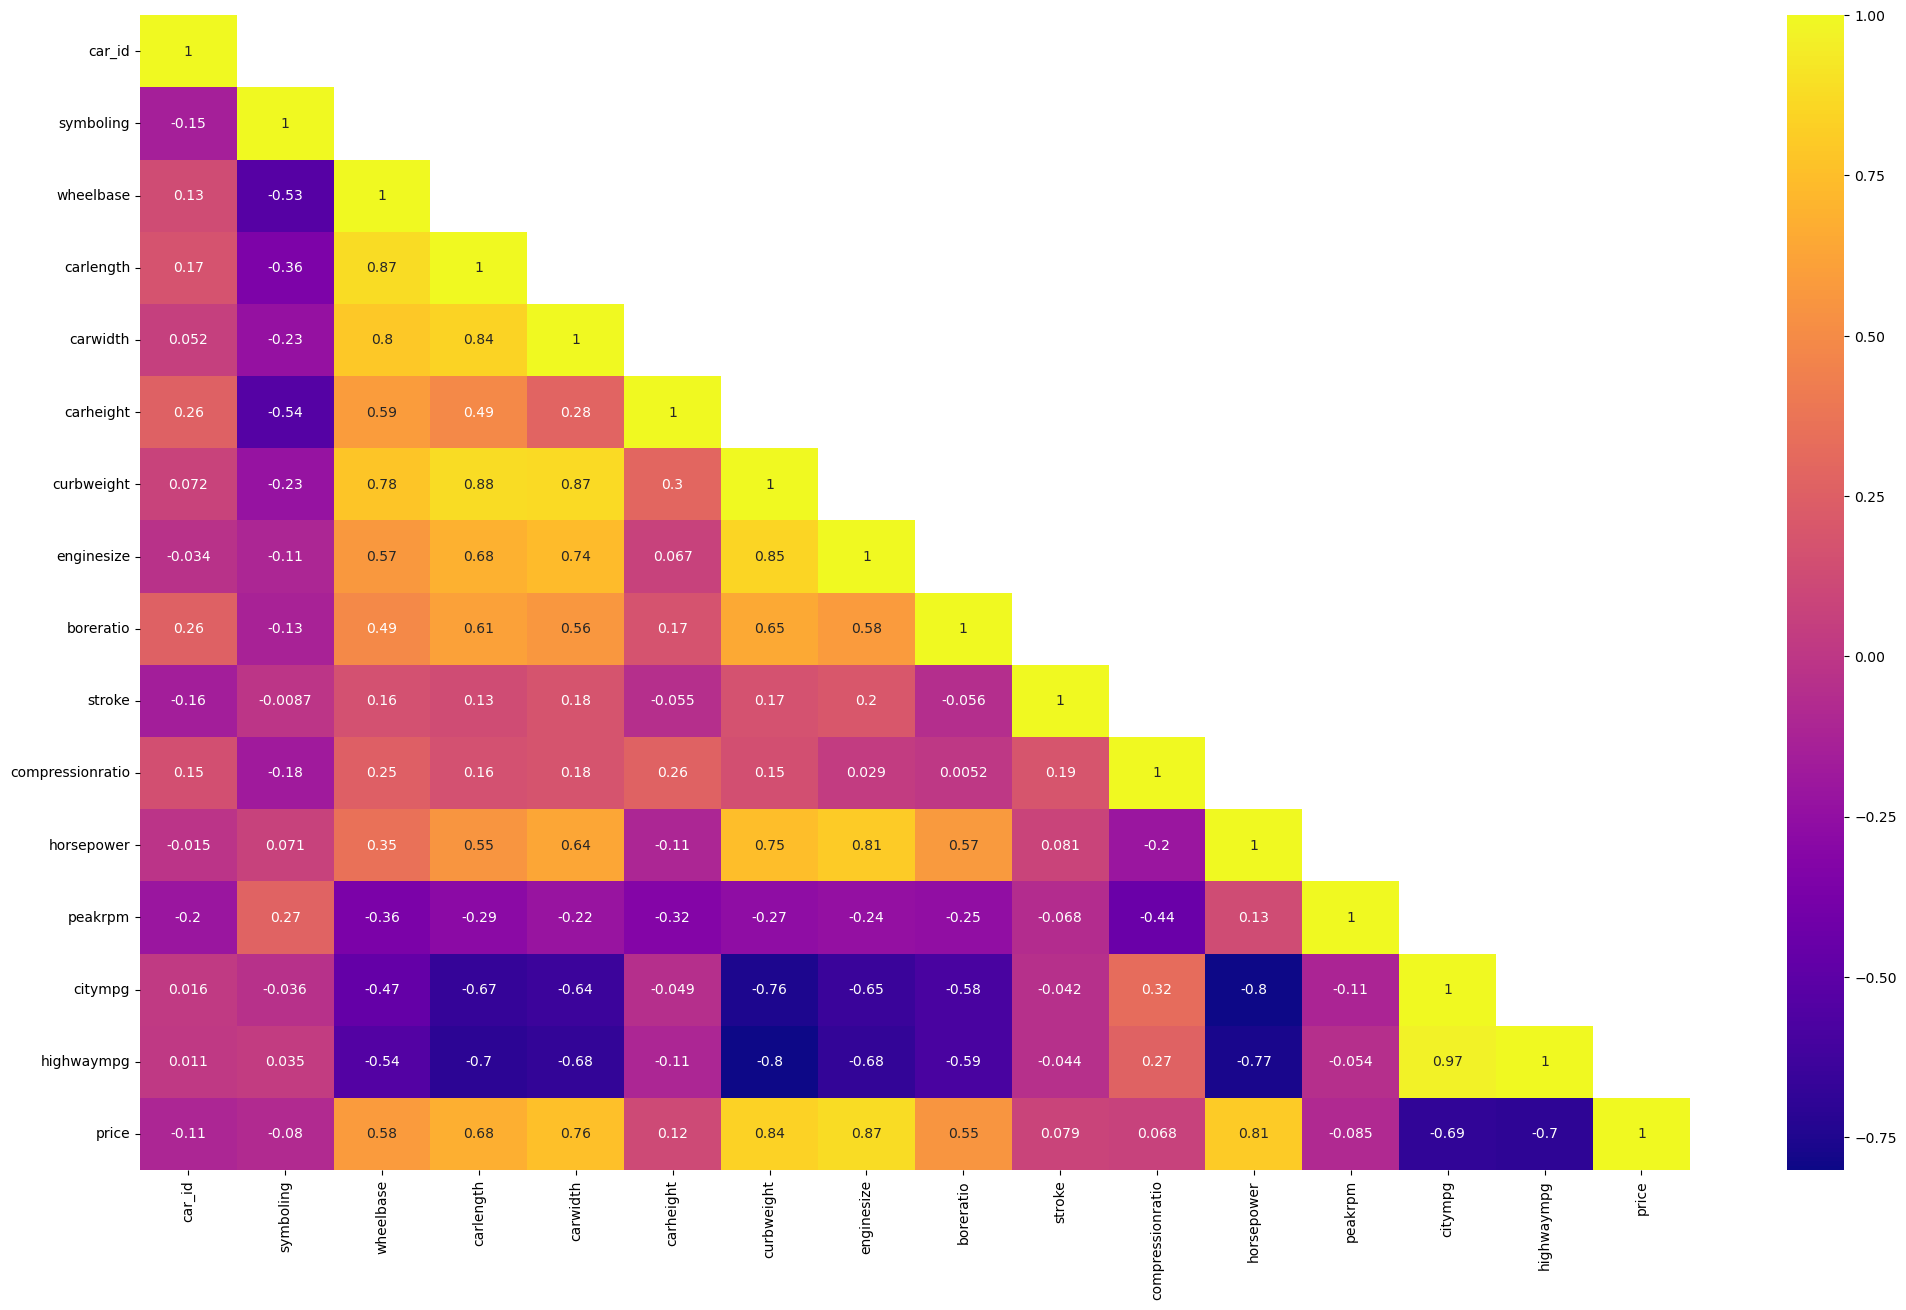

In [170]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap='plasma',mask=np.triu(df.corr(),+1))
plt.show()

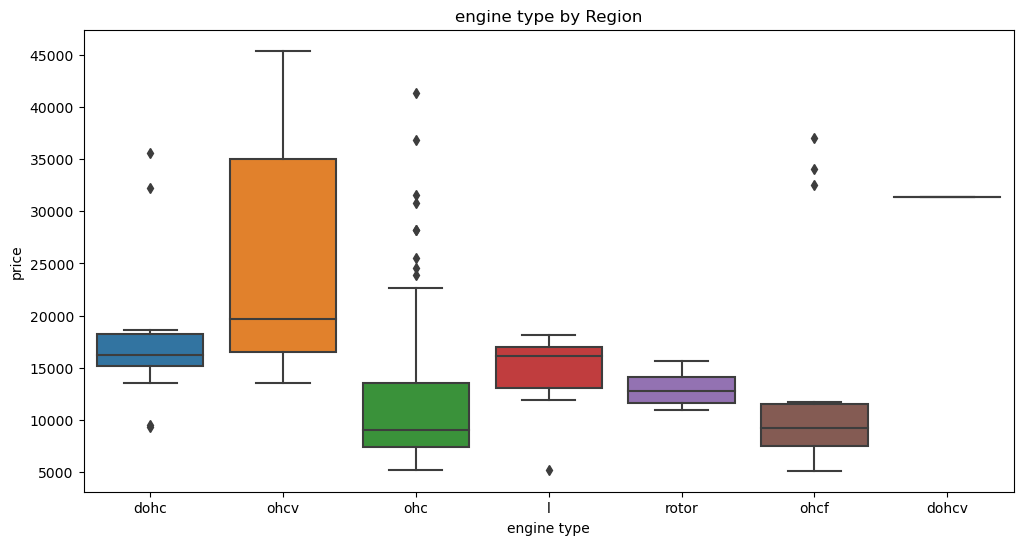

In [171]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='enginetype', y='price', data=df)
plt.xlabel('engine type')
plt.ylabel('price')
plt.title('engine type by Region')
plt.show()


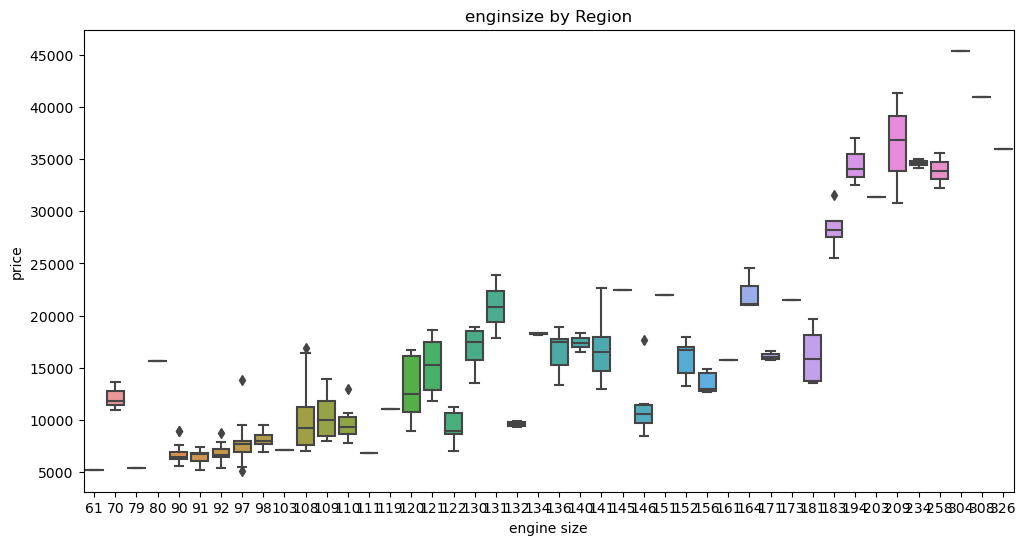

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='enginesize', y='price', data=df)
plt.xlabel('engine size')
plt.ylabel('price')
plt.title('enginsize by Region')
plt.show()


In [174]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print(' the data in 0.25%','\n',Q1)
print('\n','----------------------------------------------------')
print('the data in 0.75%','\n',Q3)

 the data in 0.25% 
 car_id                52.00
symboling              0.00
wheelbase             94.50
carlength            166.30
carwidth              64.10
carheight             52.00
curbweight          2145.00
enginesize            97.00
boreratio              3.15
stroke                 3.11
compressionratio       8.60
horsepower            70.00
peakrpm             4800.00
citympg               19.00
highwaympg            25.00
price               7788.00
Name: 0.25, dtype: float64

 ----------------------------------------------------
the data in 0.75% 
 car_id                154.00
symboling               2.00
wheelbase             102.40
carlength             183.10
carwidth               66.90
carheight              55.50
curbweight           2935.00
enginesize            141.00
boreratio               3.58
stroke                  3.41
compressionratio        9.40
horsepower            116.00
peakrpm              5500.00
citympg                30.00
highwaympg             

In [175]:
IQR = Q3 - Q1
IQR

car_id               102.00
symboling              2.00
wheelbase              7.90
carlength             16.80
carwidth               2.80
carheight              3.50
curbweight           790.00
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64

In [176]:
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

In [177]:
print("Interquartile Range (IQR):",'\n','\n',IQR)
print('\n',"Lower Bound (LB):",'\n','\n', LB)
print('\n',"Upper Bound (UB):",'\n','\n', UB)

Interquartile Range (IQR): 
 
 car_id               102.00
symboling              2.00
wheelbase              7.90
carlength             16.80
carwidth               2.80
carheight              3.50
curbweight           790.00
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64

 Lower Bound (LB): 
 
 car_id              -101.000
symboling             -3.000
wheelbase             82.650
carlength            141.100
carwidth              59.900
carheight             46.750
curbweight           960.000
enginesize            31.000
boreratio              2.505
stroke                 2.660
compressionratio       7.400
horsepower             1.000
peakrpm             3750.000
citympg                2.500
highwaympg            11.500
price              -5284.500
dtype: float64

 U

In [178]:
capped_data_series = df.clip(lower=LB, upper=UB,axis =1)
capped_data_series

car_id  symboling fueltype aspiration doornumber carbody drivewheel  \
0         1          3      NaN        NaN        NaN     NaN        NaN   
1         2          3      NaN        NaN        NaN     NaN        NaN   
2         3          1      NaN        NaN        NaN     NaN        NaN   
3         4          2      NaN        NaN        NaN     NaN        NaN   
4         5          2      NaN        NaN        NaN     NaN        NaN   
..      ...        ...      ...        ...        ...     ...        ...   
200     201         -1      NaN        NaN        NaN     NaN        NaN   
201     202         -1      NaN        NaN        NaN     NaN        NaN   
202     203         -1      NaN        NaN        NaN     NaN        NaN   
203     204         -1      NaN        NaN        NaN     NaN        NaN   
204     205         -1      NaN        NaN        NaN     NaN        NaN   

    enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
0              NaN       88.6      168.8  ...       3.47    2.68   
1              NaN       88.6      168.8  ...       3.47    2.68   
2              NaN       94.5      171.2  ...       2.68    3.47   
3              NaN       99.8      176.6  ...       3.19    3.40   
4              NaN       99.4      176.6  ...       3.19    3.40   
..             ...        ...        ...  ...        ...     ...   
200            NaN      109.1      188.8  ...       3.78    3.15   
201            NaN      109.1      188.8  ...       3.78    3.15   
202            NaN      109.1      188.8  ...       3.58    2.87   
203            NaN      109.1      188.8  ...       3.01    3.40   
204            NaN      109.1      188.8  ...       3.78    3.15   

     compressionratio horsepower peakrpm  citympg highwaympg    price  \
0                 9.0        111    5000     21.0       27.0  13495.0   
1                 9.0        111    5000     21.0       27.0  16500.0   
2                 9.0        154    5000     19.0       26.0  16500.0   
3                10.0        102    5500     24.0       30.0  13950.0   
4                 8.0        115    5500     18.0       22.0  17450.0   
..                ...        ...     ...      ...        ...      ...   
200               9.5        114    5400     23.0       28.0  16845.0   
201               8.7        160    5300     19.0       25.0  19045.0   
202               8.8        134    5500     18.0       23.0  21485.0   
203              10.6        106    4800     26.0       27.0  22470.0   
204               9.5        114    5400     19.0       25.0  22625.0   

     company  model  
0        NaN    NaN  
1        NaN    NaN  
2        NaN    NaN  
3        NaN    NaN  
4        NaN    NaN  
..       ...    ...  
200      NaN    NaN  
201      NaN    NaN  
202      NaN    NaN  
203      NaN    NaN  
204      NaN    NaN  

[205 rows x 27 columns]

In [179]:
capped_data_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          0 non-null      object 
 3   aspiration        0 non-null      object 
 4   doornumber        0 non-null      object 
 5   carbody           0 non-null      object 
 6   drivewheel        0 non-null      object 
 7   enginelocation    0 non-null      object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        0 non-null      object 
 14  cylindernumber    0 non-null      object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        0 non-null      object 
 1

In [180]:
null_mask = capped_data_series.isnull()

# Sum the True values (i.e., count the number of null values) for each column
null_counts = null_mask.sum()

# Filter the columns that have null values (non-zero counts)
columns_with_null = dict(null_counts[null_counts > 0])

# Display the columns with null values
print("Columns with null values:")
print(columns_with_null)
print('\n')
print("the list of columns with null : ")
print(columns_with_null.keys())

Columns with null values:
{'fueltype': 205, 'aspiration': 205, 'doornumber': 205, 'carbody': 205, 'drivewheel': 205, 'enginelocation': 205, 'enginetype': 205, 'cylindernumber': 205, 'fuelsystem': 205, 'company': 205, 'model': 205}


the list of columns with null : 
dict_keys(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'company', 'model'])


In [181]:
df_ca = capped_data_series.drop(columns = columns_with_null.keys())
df_ca

car_id  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              10.6         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0       21.0        27.0  13495.0  
1       21.0        27.0  16500.0  
2       19.0        26.0  16500.0  
3       24.0        30.0  13950.0  
4       18.0        22.0  17450.0  
..       ...         ...      ...  
200     23.0        28.0  16845.0  
201     19.0        25.0  19045.0  
202     18.0        23.0  21485.0  
203     26.0        27.0  22470.0  
204     19.0        25.0  22625.0  

[205 rows x 16 columns]

In [225]:
df_out = pd.concat([df_ca,df_cat],axis = 1)
df_out

car_id  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  ...  aspiration  doornumber      carbody  \
0           130       3.47    2.68  ...         std         two  convertible   
1           130       3.47    2.68  ...         std         two  convertible   
2           152       2.68    3.47  ...         std         two    hatchback   
3           109       3.19    3.40  ...         std        four        sedan   
4           136       3.19    3.40  ...         std        four        sedan   
..          ...        ...     ...  ...         ...         ...          ...   
200         141       3.78    3.15  ...         std        four        sedan   
201         141       3.78    3.15  ...       turbo        four        sedan   
202         173       3.58    2.87  ...         std        four        sedan   
203         145       3.01    3.40  ...       turbo        four        sedan   
204         141       3.78    3.15  ...       turbo        four        sedan   

     drivewheel  enginelocation  enginetype cylindernumber fuelsystem  \
0           rwd           front        dohc           four       mpfi   
1           rwd           front        dohc           four       mpfi   
2           rwd           front        ohcv            six       mpfi   
3           fwd           front         ohc           four       mpfi   
4           4wd           front         ohc           five       mpfi   
..          ...             ...         ...            ...        ...   
200         rwd           front         ohc           four       mpfi   
201         rwd           front         ohc           four       mpfi   
202         rwd           front        ohcv            six       mpfi   
203         rwd           front         ohc            six        idi   
204         rwd           front         ohc           four       mpfi   

         company         model  
0    alfa-romero        giulia  
1    alfa-romero       stelvio  
2    alfa-romero  Quadrifoglio  
3           audi        100 ls  
4           audi         100ls  
..           ...           ...  
200        volvo     145e (sw)  
201        volvo         144ea  
202        volvo         244dl  
203        volvo           246  
204        volvo         264gl  

[205 rows x 27 columns]

In [226]:
df_out.isnull().sum()

car_id              0
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
enginetype          0
cylindernumber      0
fuelsystem          0
company             0
model               0
dtype: int64

the data before outlier treatment


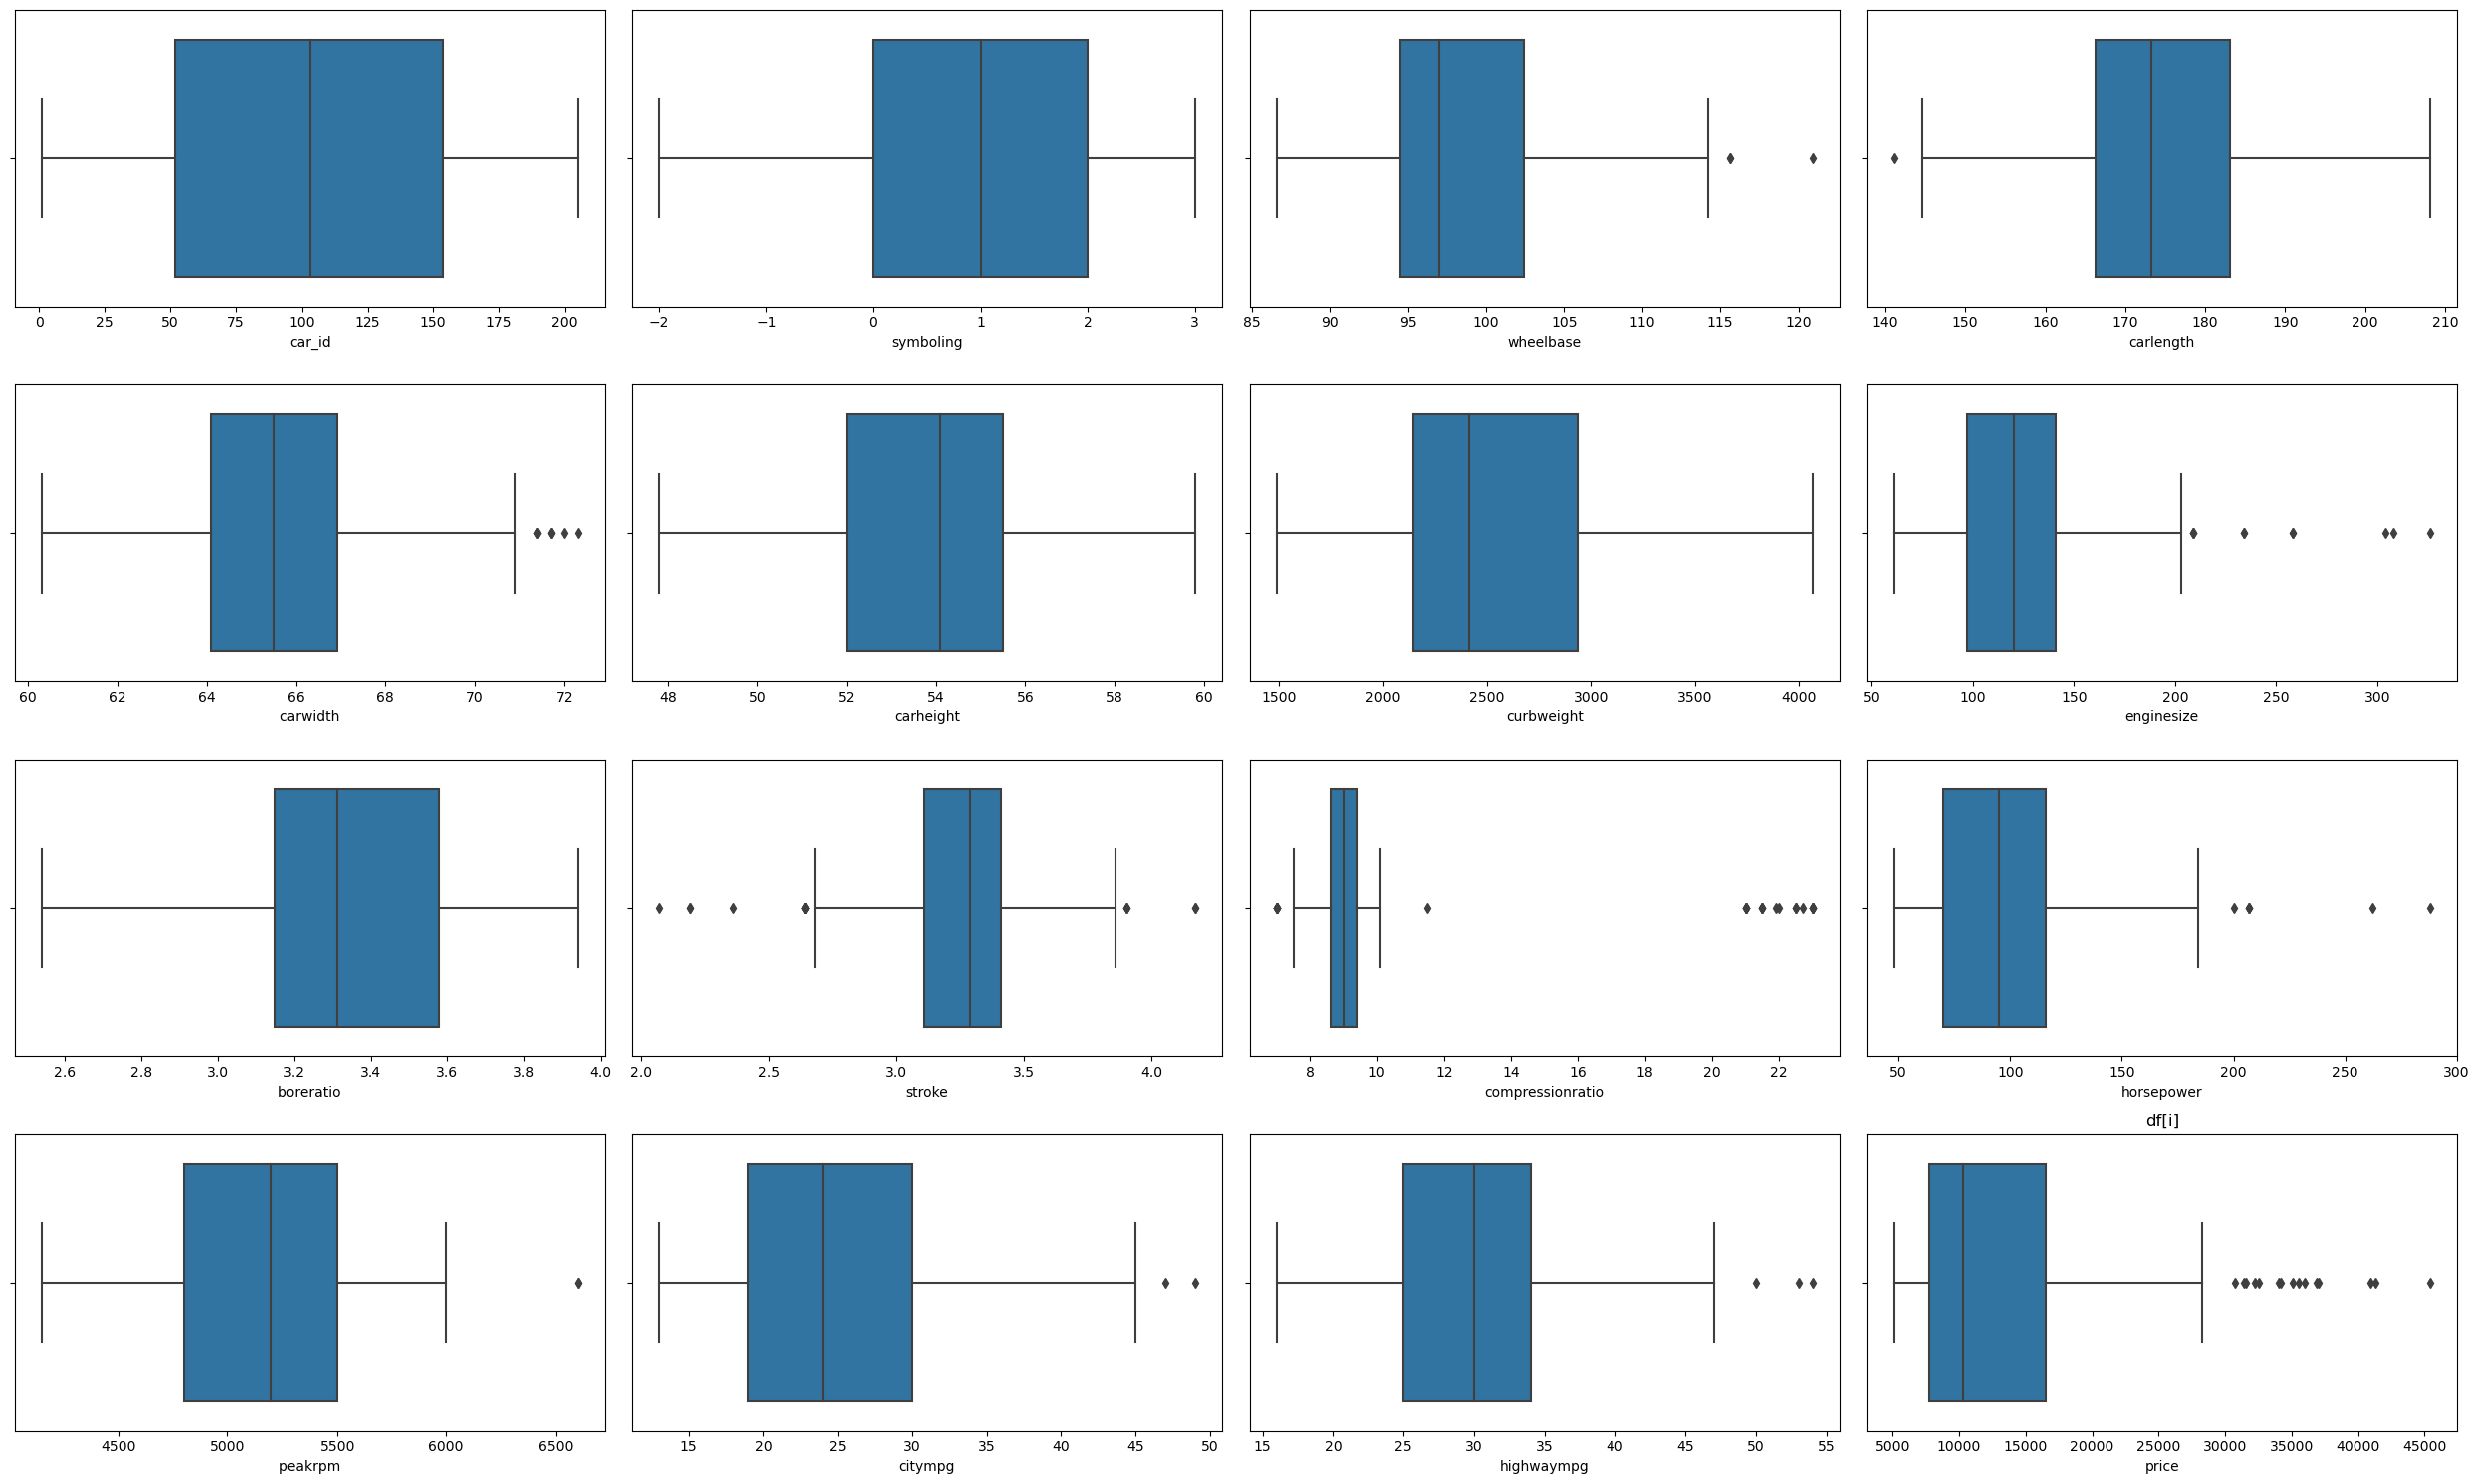

In [227]:
print('the data before outlier treatment')
fig, ax= plt.subplots(4,4, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

the data after outlier treatment


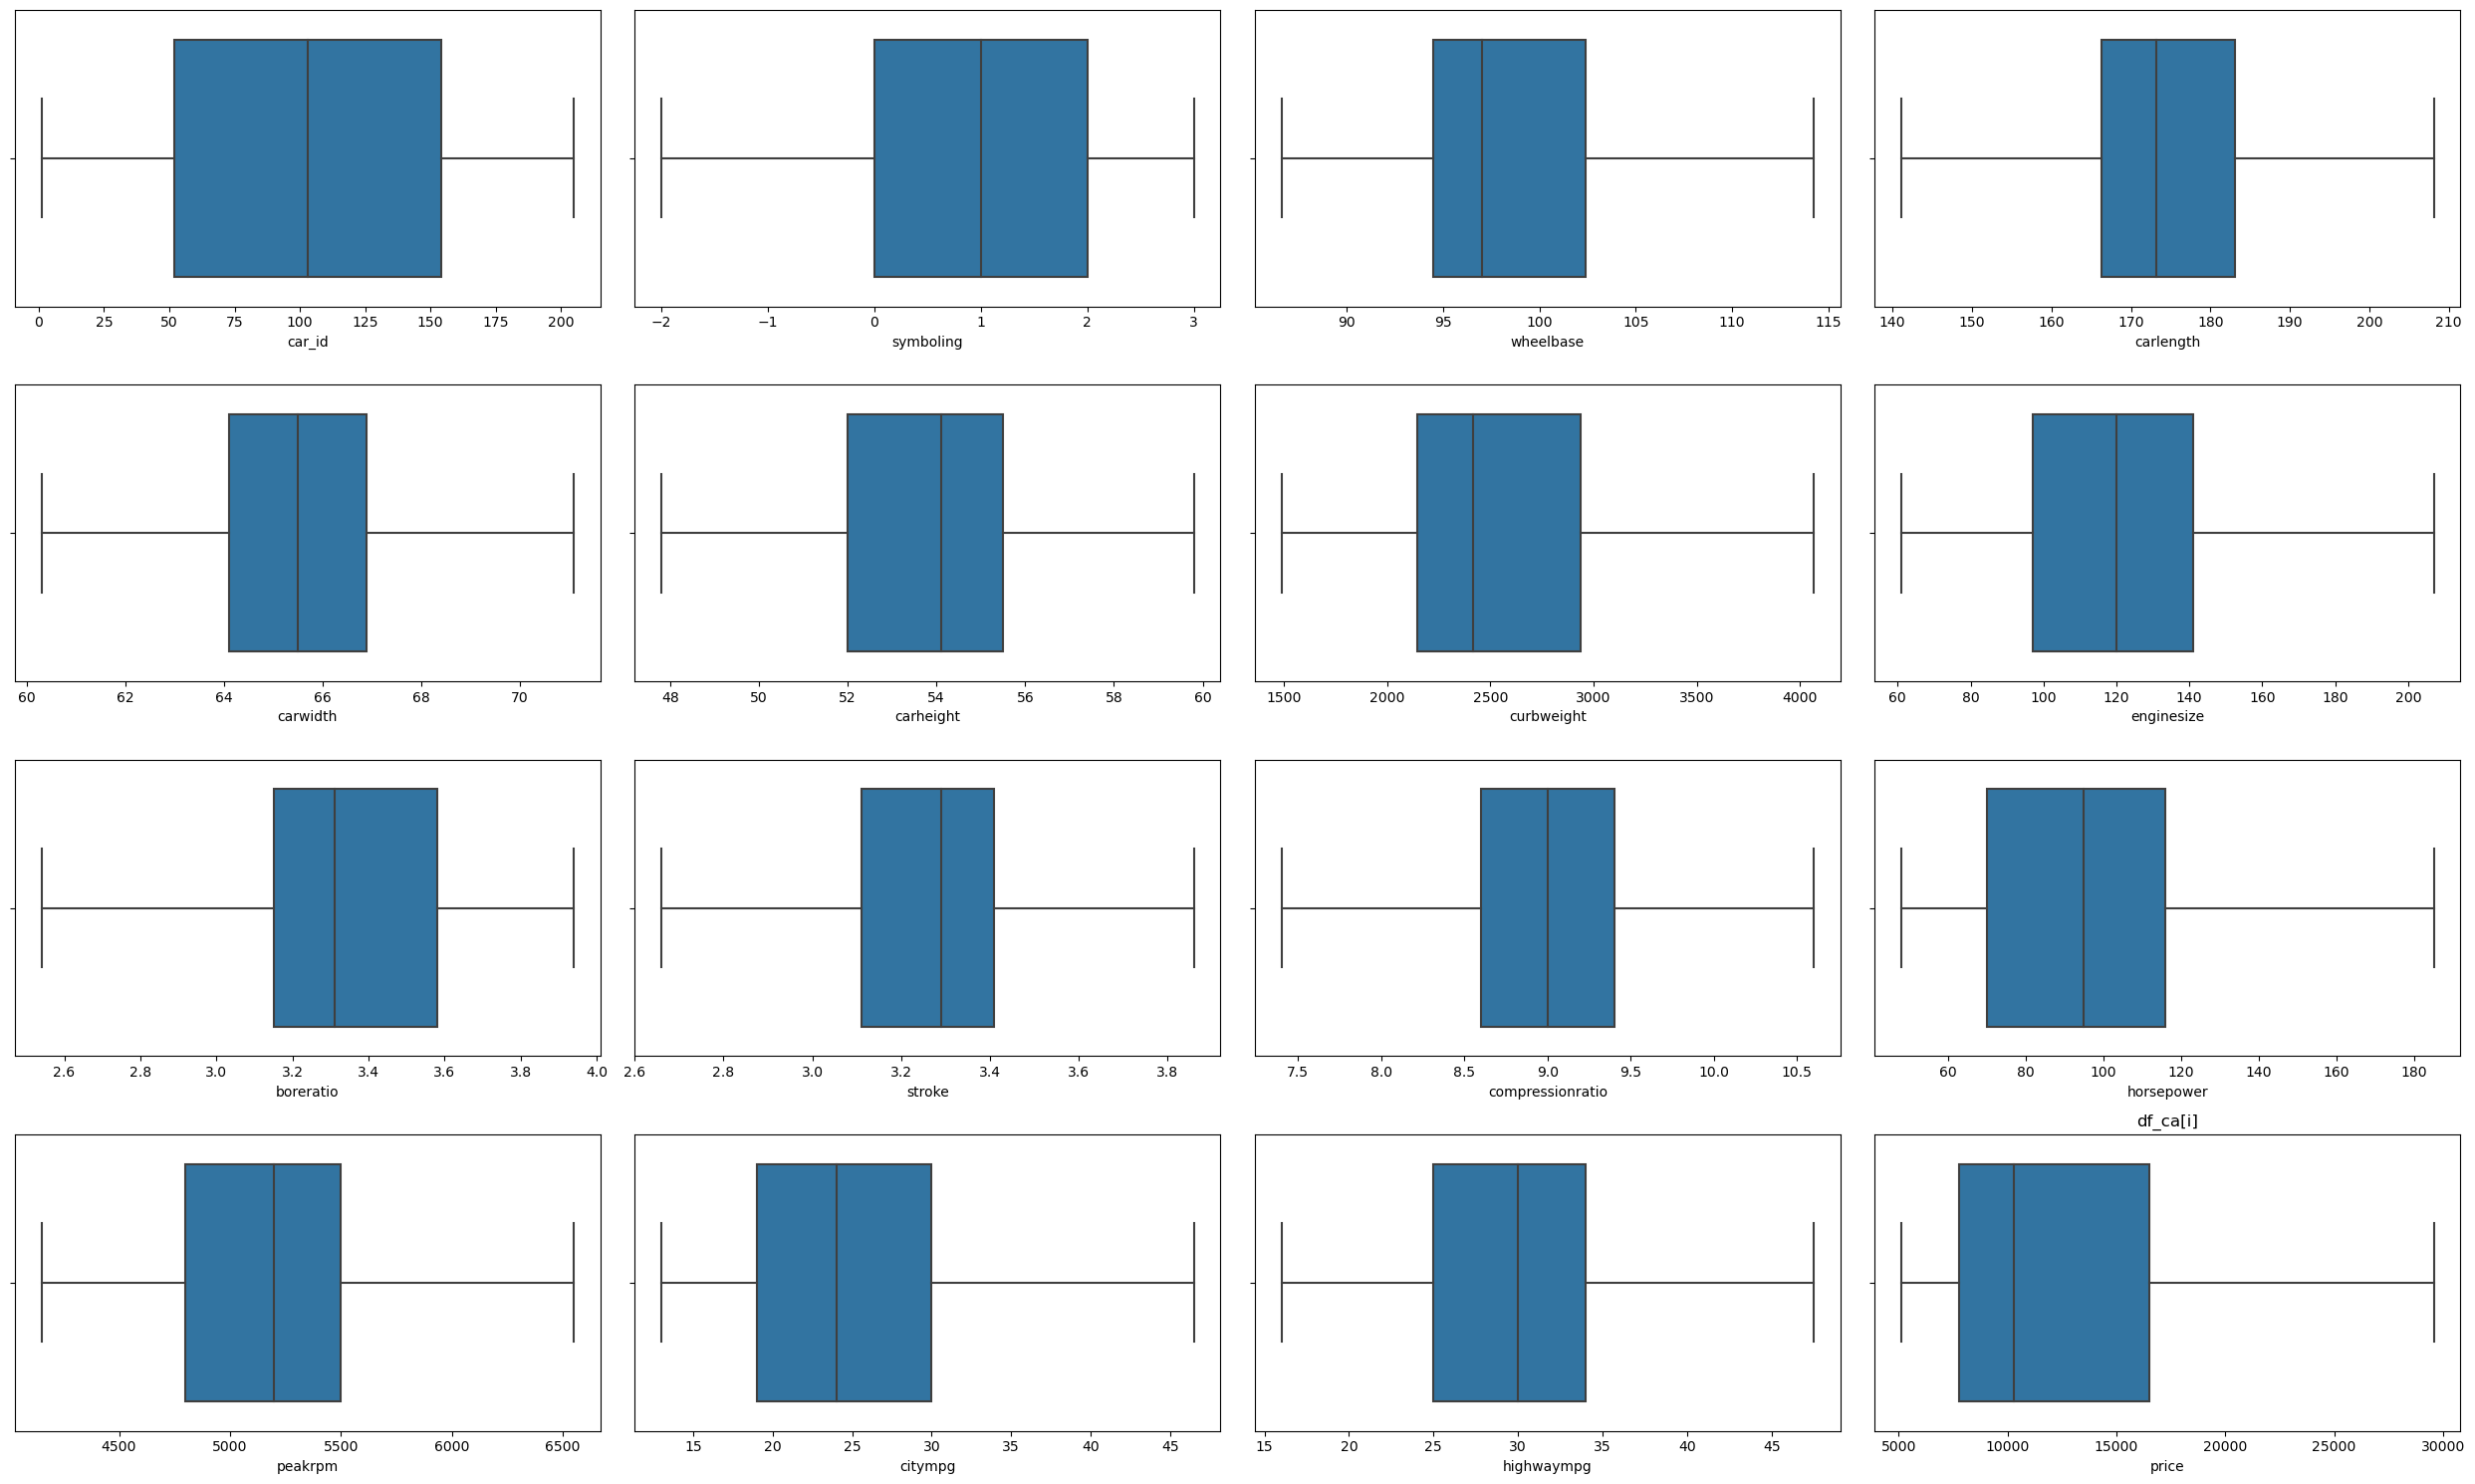

In [228]:
print('the data after outlier treatment')
fig, ax= plt.subplots(4,4, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_ca[i], ax=subplot)
    plt.title('df_ca[i]')

plt.tight_layout()
plt.show()

In [229]:
df_out_cat_columns = df_out.select_dtypes(include='object')
df_out_cat_columns.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company', 'model'],
      dtype='object')

In [230]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to be label encoded
columns_to_encode = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                     'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
                     'company', 'model']

# Perform label encoding for each column
for column in columns_to_encode:
    df_out[column] = label_encoder.fit_transform(df_out[column])

# Display the DataFrame after label encoding
df_out

car_id  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  ...  aspiration  doornumber  carbody  \
0           130       3.47    2.68  ...           0           1        0   
1           130       3.47    2.68  ...           0           1        0   
2           152       2.68    3.47  ...           0           1        2   
3           109       3.19    3.40  ...           0           0        3   
4           136       3.19    3.40  ...           0           0        3   
..          ...        ...     ...  ...         ...         ...      ...   
200         141       3.78    3.15  ...           0           0        3   
201         141       3.78    3.15  ...           1           0        3   
202         173       3.58    2.87  ...           0           0        3   
203         145       3.01    3.40  ...           1           0        3   
204         141       3.78    3.15  ...           1           0        3   

     drivewheel  enginelocation  enginetype  cylindernumber  fuelsystem  \
0             2               0           0               2           5   
1             2               0           0               2           5   
2             2               0           5               3           5   
3             1               0           3               2           5   
4             0               0           3               1           5   
..          ...             ...         ...             ...         ...   
200           2               0           3               2           5   
201           2               0           3               2           5   
202           2               0           5               3           5   
203           2               0           3               3           3   
204           2               0           3               2           5   

     company  model  
0          1     78  
1          1    122  
2          1     28  
3          2      0  
4          2      1  
..       ...    ...  
200       26      5  
201       26      4  
202       26      6  
203       26      8  
204       26      9  

[205 rows x 27 columns]

In [231]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    float64
 14  highwaympg        205 non-null    float64
 15  price             205 non-null    float64
 16  fueltype          205 non-null    int32  
 1

In [232]:
X = df_out.drop(['price','car_id'],axis = 1)
y = df_out['price']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test,y_pred)
print('r2_score : ',r2)
print('rmse : ',np.sqrt(mse))

Mean Squared Error: 6872959.3315292755
r2_score :  0.870227937538008
rmse :  2621.6329513357273


In [233]:
# Creating and training the Decision Tree Regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model's performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)
r2 = r2_score(y_test,y_pred_dt)
print('r2_score : ',r2)
print('rmse : ',np.sqrt(mse))

Decision Tree MSE: 3088231.691509488
r2_score :  0.9416894271250548
rmse :  2621.6329513357273


In [234]:
# Creating and training the Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
r2 = r2_score(y_test,y_pred_rf)
print('r2_score : ',r2)
print('rmse : ',np.sqrt(mse))

Random Forest MSE: 2132621.7556474144
r2_score :  0.959732815177287
rmse :  2621.6329513357273


In [235]:
# Creating and training the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)
r2 = r2_score(y_test,y_pred_gb)
print('r2_score : ',r2)
print('rmse : ',np.sqrt(mse))

Gradient Boosting MSE: 2227250.5698204655
r2_score :  0.9579460773557441
rmse :  2621.6329513357273


In [236]:
# Creating and training the Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluating the model's performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Support Vector Regression MSE:", mse_svr)
r2 = r2_score(y_test,y_pred_svr)
print('r2_score : ',r2)
print('rmse : ',np.sqrt(mse))

Support Vector Regression MSE: 57995812.853735425
r2_score :  -0.09505031022994803
rmse :  2621.6329513357273


In [237]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test set
X_test_scaled = scaler.transform(X_test)


In [238]:
# Creating and training the Linear Regression model with scaled data
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_linear = model_linear.predict(X_test_scaled)

# Evaluating the model's performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression MSE:", mse_linear)
print("Linear Regression R2 Score:", r2_linear)

Linear Regression MSE: 6872959.331529308
Linear Regression R2 Score: 0.8702279375380074


In [239]:
# Creating and training the Decision Tree Regression model with scaled data
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_decision_tree = model_decision_tree.predict(X_test_scaled)

# Evaluating the model's performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print("Decision Tree Regression MSE:", mse_decision_tree)
print("Decision Tree Regression R2 Score:", r2_decision_tree)

Decision Tree Regression MSE: 3317109.105168024
Decision Tree Regression R2 Score: 0.9373678688866437


In [240]:
# Creating and training the Random Forest Regression model with scaled data
model_random_forest = RandomForestRegressor()
model_random_forest.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_random_forest = model_random_forest.predict(X_test_scaled)

# Evaluating the model's performance
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
print("Random Forest Regression MSE:", mse_random_forest)
print("Random Forest Regression R2 Score:", r2_random_forest)

Random Forest Regression MSE: 2034146.274824244
Random Forest Regression R2 Score: 0.9615921839923671


In [241]:
# Creating and training the Gradient Boosting Regression model with scaled data
model_gradient_boosting = GradientBoostingRegressor()
model_gradient_boosting.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test_scaled)

# Evaluating the model's performance
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Regression MSE:", mse_gradient_boosting)
print("Gradient Boosting Regression R2 Score:", r2_gradient_boosting)

Gradient Boosting Regression MSE: 2249001.4181782412
Gradient Boosting Regression R2 Score: 0.957535387823691


In [242]:
# Creating and training the Support Vector Regression model with scaled data
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_svr = model_svr.predict(X_test_scaled)

# Evaluating the model's performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression MSE:", mse_svr)
print("Support Vector Regression R2 Score:", r2_svr)

Support Vector Regression MSE: 57862141.54410453
Support Vector Regression R2 Score: -0.09252638993505857


In [243]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have already defined X and y (feature matrix and target vector)

# Create a linear regression model
model = LinearRegression()

# Define the number of folds (k)
k = 5

# Create a k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the performance metrics
mse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE score to the list
    mse_scores.append(mse)

# Calculate the average MSE score
average_mse = sum(mse_scores) / len(mse_scores)
print("Average MSE:", average_mse)


Average MSE: 6030161.690512774


In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest regression model
rf_model = RandomForestRegressor()

# Define the number of folds (k)
k = 5

# Create a k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the performance metrics
mse_scores = []
r2_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Append the scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average MSE and R-squared score
average_mse = sum(mse_scores) / len(mse_scores)
average_r2 = sum(r2_scores) / len(r2_scores)

print("Random Forest Regression Average MSE:", average_mse)
print("Random Forest Regression Average R-squared Score:", average_r2)


Random Forest Regression Average MSE: 3320062.080879511
Random Forest Regression Average R-squared Score: 0.9221456733670568


In [245]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor()

# Define the number of folds (k)
k = 5

# Create a k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the performance metrics
mse_scores = []
r2_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    dt_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = dt_model.predict(X_test)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Append the scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the average MSE and R-squared score
average_mse = sum(mse_scores) / len(mse_scores)
average_r2 = sum(r2_scores) / len(r2_scores)

print("Decision Tree Regression Average MSE:", average_mse)
print("Decision Tree Regression Average R-squared Score:", average_r2)


Decision Tree Regression Average MSE: 5394016.929570191
Decision Tree Regression Average R-squared Score: 0.8682044537151542


In [248]:
# Creating and training the Gradient Boosting Regression model with scaled data
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regression MSE:", mse_gb)
print("Gradient Boosting Regression R2 Score:", r2_gb)

Gradient Boosting Regression MSE: 2550605.6330886744
Gradient Boosting Regression R2 Score: 0.9476296335597383


In [249]:
# Creating and training the Gradient Boosting Regression model with scaled data
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluating the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regression MSE:", mse_gb)
print("Gradient Boosting Regression R2 Score:", r2_gb)

Gradient Boosting Regression MSE: 66777516.21088579
Gradient Boosting Regression R2 Score: -0.37111082503949966


In [251]:
# Creating and training the XGBoost Regression model with scaled data
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Regression MSE:", mse_xgb)
print("XGBoost Regression R2 Score:", r2_xgb)


XGBoost Regression MSE: 3080392.4772687014
XGBoost Regression R2 Score: 0.936751773491916


In [252]:
# Creating and training the XGBoost Regression model with scaled data
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluating the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Regression MSE:", mse_xgb)
print("XGBoost Regression R2 Score:", r2_xgb)


XGBoost Regression MSE: 82916913.1993441
XGBoost Regression R2 Score: -0.7024933498192656


In [253]:
# Creating and training the AdaBoost Regression model with scaled data
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluating the model's performance
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print("AdaBoost Regression MSE:", mse_ada)
print("AdaBoost Regression R2 Score:", r2_ada)

AdaBoost Regression MSE: 3250677.416762641
AdaBoost Regression R2 Score: 0.9332553942144358


In [254]:
# Creating and training the AdaBoost Regression model with scaled data
ada_model = AdaBoostRegressor()
ada_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_ada = ada_model.predict(X_test_scaled)

# Evaluating the model's performance
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print("AdaBoost Regression MSE:", mse_ada)
print("AdaBoost Regression R2 Score:", r2_ada)

AdaBoost Regression MSE: 59291903.64051388
AdaBoost Regression R2 Score: -0.21741231976901543


In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Create the models
gb_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()
ada_model = AdaBoostRegressor()

# Perform cross-validation for Gradient Boosting
gb_mse_scores = -cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
gb_r2_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
average_gb_mse = gb_mse_scores.mean()
average_gb_r2 = gb_r2_scores.mean()

# Perform cross-validation for XGBoost
xgb_mse_scores = -cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
xgb_r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
average_xgb_mse = xgb_mse_scores.mean()
average_xgb_r2 = xgb_r2_scores.mean()

# Perform cross-validation for AdaBoost
ada_mse_scores = -cross_val_score(ada_model, X, y, cv=5, scoring='neg_mean_squared_error')
ada_r2_scores = cross_val_score(ada_model, X, y, cv=5, scoring='r2')
average_ada_mse = ada_mse_scores.mean()
average_ada_r2 = ada_r2_scores.mean()

# Print the results
print("Gradient Boosting Regression")
print("Average MSE:", average_gb_mse)
print("Average R2 Score:", average_gb_r2)

print("\nXGBoost Regression")
print("Average MSE:", average_xgb_mse)
print("Average R2 Score:", average_xgb_r2)

print("\nAdaBoost Regression")
print("Average MSE:", average_ada_mse)
print("Average R2 Score:", average_ada_r2)

Gradient Boosting Regression
Average MSE: 11350064.15683508
Average R2 Score: 0.5502786059745807

XGBoost Regression
Average MSE: 11963423.414994776
Average R2 Score: 0.5498344503977473

AdaBoost Regression
Average MSE: 13824620.620773379
Average R2 Score: 0.44410424214154914


In [257]:
# Creating and training the Lasso Regression model with scaled data
lasso_model = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_lasso = -lasso_scores.mean()
print("Lasso Regression Average MSE:", average_mse_lasso)

Lasso Regression Average MSE: 11503235.80011466


In [258]:
# Creating and training the Lasso Regression model with scaled data
lasso_model = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_lasso = -lasso_scores.mean()
print("Lasso Regression Average MSE:", average_mse_lasso)

Lasso Regression Average MSE: 59928095.12889884


In [259]:
# Creating and training the Ridge Regression model with scaled data
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_ridge = -ridge_scores.mean()
print("Ridge Regression Average MSE:", average_mse_ridge)

Ridge Regression Average MSE: 10892707.970520992


In [260]:
# Creating and training the Ridge Regression model with scaled data
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_ridge = -ridge_scores.mean()
print("Ridge Regression Average MSE:", average_mse_ridge)

Ridge Regression Average MSE: 58068700.7341851


In [261]:
# Creating and training the ElasticNet model with scaled data
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can experiment with different alpha and l1_ratio values
elasticnet_scores = cross_val_score(elasticnet_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_elasticnet = -elasticnet_scores.mean()
print("ElasticNet Regression Average MSE:", average_mse_elasticnet)

ElasticNet Regression Average MSE: 10730182.14893226


In [262]:
# Creating and training the ElasticNet model with scaled data
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can experiment with different alpha and l1_ratio values
elasticnet_scores = cross_val_score(elasticnet_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_elasticnet = -elasticnet_scores.mean()
print("ElasticNet Regression Average MSE:", average_mse_elasticnet)

ElasticNet Regression Average MSE: 48391290.07757428


In [266]:
# Creating and training the LightGBM model
lgb_model = LGBMRegressor()
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_lgb = -lgb_scores.mean()
print("LightGBM Regression Average MSE:", average_mse_lgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 131, number of used features: 22
[LightGBM] [Info] Start training from score 12381.877863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Regression Average MSE: 18134417.035718154


In [267]:
# Creating and training the LightGBM model
lgb_model = LGBMRegressor()
lgb_scores = cross_val_score(lgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the average MSE score
average_mse_lgb = -lgb_scores.mean()
print("LightGBM Regression Average MSE:", average_mse_lgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 131, number of used features: 22
[LightGBM] [Info] Start training from score 12381.877863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [268]:
df_out.columns

Index(['car_id', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company', 'model'],
      dtype='object')

In [280]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have already loaded the dataset into a DataFrame called 'df'
# and the target variable 'price' is stored in 'y'

# Step 1: No feature engineering needed for derived features (carlength, carwidth, carheight, curbweight)

# Step 2: No feature engineering needed for engine features
df = pd.concat([df_ca,df_cat],axis = 1)
df

# Step 3: No feature engineering needed for fuel and aspiration

# Step 4: One-hot encoding for carbody, doornumber, and enginelocation
categorical_columns = ['carbody', 'doornumber', 'enginelocation','fueltype', 'aspiration', 'enginetype', 'cylindernumber', 'company','model']
ohe = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df[categorical_columns]))
encoded_features.columns = ohe.get_feature_names(categorical_columns)
df.drop(categorical_columns, axis=1, inplace=True)
df = pd.concat([df, encoded_features], axis=1)

# Step 5: One-hot encoding for drivewheel
categorical_column = 'drivewheel'
ohe = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df[[categorical_column]]))
encoded_features.columns = ohe.get_feature_names([categorical_column])
df.drop(categorical_column, axis=1, inplace=True)
df = pd.concat([df, encoded_features], axis=1)

# Step 6: One-hot encoding for fuelsystem
categorical_column = 'fuelsystem'
ohe = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df[[categorical_column]]))
encoded_features.columns = ohe.get_feature_names([categorical_column])
df.drop(categorical_column, axis=1, inplace=True)
df = pd.concat([df, encoded_features], axis=1)

# Step 7: No feature engineering needed for company and model columns

# Now the DataFrame 'df' contains all the processed features
# You can use 'df' for further analysis and modeling
df

car_id  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  ...  model_z4  drivewheel_fwd  \
0           130       3.47    2.68  ...       0.0             0.0   
1           130       3.47    2.68  ...       0.0             0.0   
2           152       2.68    3.47  ...       0.0             0.0   
3           109       3.19    3.40  ...       0.0             1.0   
4           136       3.19    3.40  ...       0.0             0.0   
..          ...        ...     ...  ...       ...             ...   
200         141       3.78    3.15  ...       0.0             0.0   
201         141       3.78    3.15  ...       0.0             0.0   
202         173       3.58    2.87  ...       0.0             0.0   
203         145       3.01    3.40  ...       0.0             0.0   
204         141       3.78    3.15  ...       0.0             0.0   

     drivewheel_rwd  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0               1.0              0.0              0.0             0.0   
1               1.0              0.0              0.0             0.0   
2               1.0              0.0              0.0             0.0   
3               0.0              0.0              0.0             0.0   
4               0.0              0.0              0.0             0.0   
..              ...              ...              ...             ...   
200             1.0              0.0              0.0             0.0   
201             1.0              0.0              0.0             0.0   
202             1.0              0.0              0.0             0.0   
203             1.0              0.0              0.0             1.0   
204             1.0              0.0              0.0             0.0   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0               0.0              1.0              0.0              0.0  
1               0.0              1.0              0.0              0.0  
2               0.0              1.0              0.0              0.0  
3               0.0              1.0              0.0              0.0  
4               0.0              1.0              0.0              0.0  
..              ...              ...              ...              ...  
200             0.0              1.0              0.0              0.0  
201             0.0              1.0              0.0              0.0  
202             0.0              1.0              0.0              0.0  
203             0.0              0.0              0.0              0.0  
204             0.0              1.0              0.0              0.0  

[205 rows x 213 columns]

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 213 entries, car_id to fuelsystem_spfi
dtypes: float64(207), int64(6)
memory usage: 341.3 KB


In [282]:
X = df.drop(['price','car_id'],axis = 1)
y = df['price']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test,y_pred)
print('r2_score : ',r2)
print('rmse : ',np.sqrt(mse))

Mean Squared Error: 9799152.440430831
r2_score :  0.8149769027818152
rmse :  3130.3597940861096
